# Market Analytics and Statistical Modelling

## Introduction 

Marketing analytics is measuring, analyzing, and managing marketing strategy's performance to maximize its effectiveness and optimize your return on investment (ROI). Data analytics is an important component of decision making strategy which allow marketers to be more efficient and minimize wasting the marketing budget. Every day there are decisions in the companies to be made. business decision-making process is based on data. With the help of statistical models, we are able to support these decisions. Statistical modeling has an important impact on the performance of the businesses. 

## Problem Statement

The sales department of XXXXX company have hired Data Scientists from Springboard to explore their data sets and come up with strategies to provide key business insights in their decision making. 

## Datasets 

The data sets are clean with no missing values. These dataset were taken from course in R in datacamp.
source: https://campus.datacamp.com/courses/marketing-analytics-in-r-statistical-modeling/

- Sales Data, Sales Data-months 2-4, (predicting sales using linear regression model)
- Churn Data ( predicting when the customer will churn using logistic regression model)
- survival data, Default data, (Survival analysis uisng KM nad Cox PH models)
- News data. First CLV and Second CLV data sets. (CRM data analysis by PCA and linear regression analysis)

## Questions to be addressed


- How can you decide which customers are most valuable for your business?

- We will model the customer lifetime value using linear regression. Predicting if a customer will leave your business, or churn, is important for targeting valuable customers and retaining those who are at risk. We will model customer churn using logistic regression.

- We will model the time to an event using survival analysis. This could be the time until next order or until a person churns.

- How do you analyze CRM data? We will use PCA to condense information to single indices and to solve multicollinearity problems in a regression analysis with many intercorrelated variables.


## Methods Used for Data Analysis 

- Linear Regression analysis followed by evaluation of the model and prediction of sales. 
- Logistic Regression analysis to predict customer churn.  
- Survival Analysis through Kaplan-Meier and Cox PH methods. 
- PCA component analysis of the CRM data followed by linear regression, model selection and fine tuning the model. 

## Significance

“Companies making improvements in their measurements and ROI capabilities are more likely to report outgrowing” competitors and a higher level of effectiveness and efficiency in their marketing.”

Market analytics and statistical modelling provides exact quantitative information. Beyond the obvious sales and lead generation applications, marketing analytics can offer profound insights into customer preferences and trends. 
 
source:https://www.wordstream.com/marketing-analytics

In [6]:
#importing and opening the files
defaultData = pd.read_csv('defaultData.csv', sep = ';')
salesData = pd.read_csv('salesData.csv')
salesDataMon2To4 = pd.read_csv('salesDataMon2To4.csv')
survivalDataExercise = pd.read_csv('survivalDataExercise.csv')
churn_data = pd.read_csv('churn_data.csv')
clv_data = pd.read_csv('clvData1.csv')
clv_Data2 = pd.read_csv('clvData2.csv')

In [7]:
defaultData = pd.read_csv('defaultData.csv', sep = ';')

In [8]:
# reading the newsData.RData file
import pyreadr
newsData = pyreadr.read_r('newsData.RData')

# (I) Modelling The Customer Lifetime Value 

In [491]:
# Importing libraries and packages 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [20,10]

import seaborn as sns
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
plt.style.use('ggplot')

from IPython.display import Image
from IPython.core.display import HTML 

We will be using salesData for this analysis. 

In [9]:
#It contains information on customers for the months one to three. 
#Only the sales of month four are included. 
salesData.head()

id  nItems     mostFreqStore mostFreqCat  nCats preferredBrand  nBrands  \
0   1    1469          Stockton     Alcohol     72          Veina      517   
1   2    1463          Stockton     Alcohol     73          Veina      482   
2   3     262  Colorado Springs       Shoes     55             Bo      126   
3   4     293  Colorado Springs      Bakery     50          Veina      108   
4   5     108  Colorado Springs   Beverages     32             Bo       79   

   nPurch  salesLast3Mon  salesThisMon  daysSinceLastPurch  meanItemPrice  \
0      82        2741.97       1283.87                   1       1.866555   
1      88        2790.58       1242.60                   1       1.907437   
2      56        1529.55        682.57                   1       5.837977   
3      43        1765.81        730.23                   1       6.026655   
4      18        1180.00        552.54                  12      10.925926   

   meanShoppingCartValue  customerDuration  
0              33.438659               821  
1              31.711136               657  
2              27.313393               548  
3              41.065349               596  
4              65.555556               603

In [10]:
#check the column name and types. 
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 14 columns):
id                       5122 non-null int64
nItems                   5122 non-null int64
mostFreqStore            5122 non-null object
mostFreqCat              5122 non-null object
nCats                    5122 non-null int64
preferredBrand           5122 non-null object
nBrands                  5122 non-null int64
nPurch                   5122 non-null int64
salesLast3Mon            5122 non-null float64
salesThisMon             5122 non-null float64
daysSinceLastPurch       5122 non-null int64
meanItemPrice            5122 non-null float64
meanShoppingCartValue    5122 non-null float64
customerDuration         5122 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 560.3+ KB


In [11]:
salesData.shape

(5122, 14)

The following table gives a description of some of the variables in the data sets whose meaning is less obvious.

![](../figure/salesdata.png)  # have to use ../ if the files are at same level. 

## EDA & Summary Statistics 

**Using Sales Data** 

In [12]:
#exploring stats for all columns. 
salesData.describe()

id       nItems        nCats      nBrands       nPurch  \
count  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000   
mean   2740.341468   186.269426    36.358649    81.915072    19.877587   
std    1573.603725   136.885007    13.357449    48.013472    12.545377   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%    1381.250000    83.000000    27.000000    45.000000    11.000000   
50%    2742.500000   157.000000    37.000000    75.500000    17.000000   
75%    4098.750000   258.000000    47.000000   111.000000    26.000000   
max    5455.000000  1469.000000    73.000000   517.000000    88.000000   

       salesLast3Mon  salesThisMon  daysSinceLastPurch  meanItemPrice  \
count    5122.000000   5122.000000         5122.000000    5122.000000   
mean     1322.604492    605.846193            6.277235      12.253981   
std       370.696876    184.196839            8.926092      16.403479   
min       188.990000      0.000000            1.000000       1.866555   
25%      1067.300000    480.982500            2.000000       6.016695   
50%      1332.135000    607.810000            3.000000       8.529072   
75%      1573.530000    731.535000            7.000000      13.185741   
max      2790.580000   1362.780000           89.000000     377.900000   

       meanShoppingCartValue  customerDuration  
count            5122.000000       5122.000000  
mean               91.810634        644.078485  
std                61.891531        151.560904  
min                17.351562          0.000000  
25%                54.429474        547.000000  
50%                76.565747        649.000000  
75%               110.610227        745.000000  
max               914.040000       1355.000000

For this analysis our target variable is "**salesThisMon**", other variables are explanatory variables. 

We will explore the data through heatmaps, pairplots and correlation plots. We will also compare the distribution of targetr variables across categorical variables by visualization with boxplots.  

## Correlation between variables 

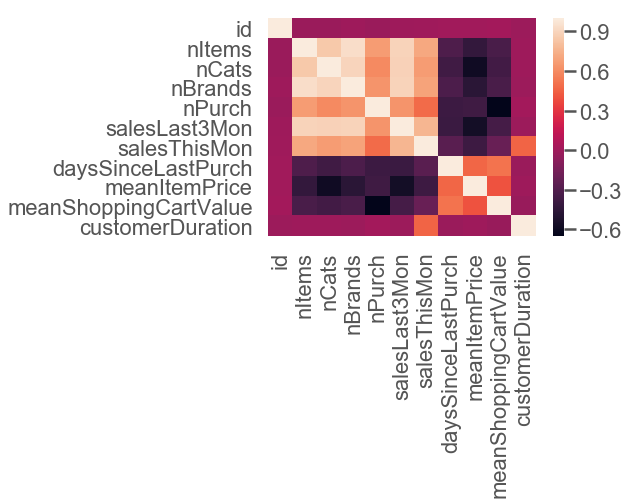

In [13]:
#visualize the correlation of the continuous explanatory variables for the past three months with the 
#sales variable of this month. 
import seaborn as sns
corr = salesData.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('sales_heatmap.png', dpi=200)

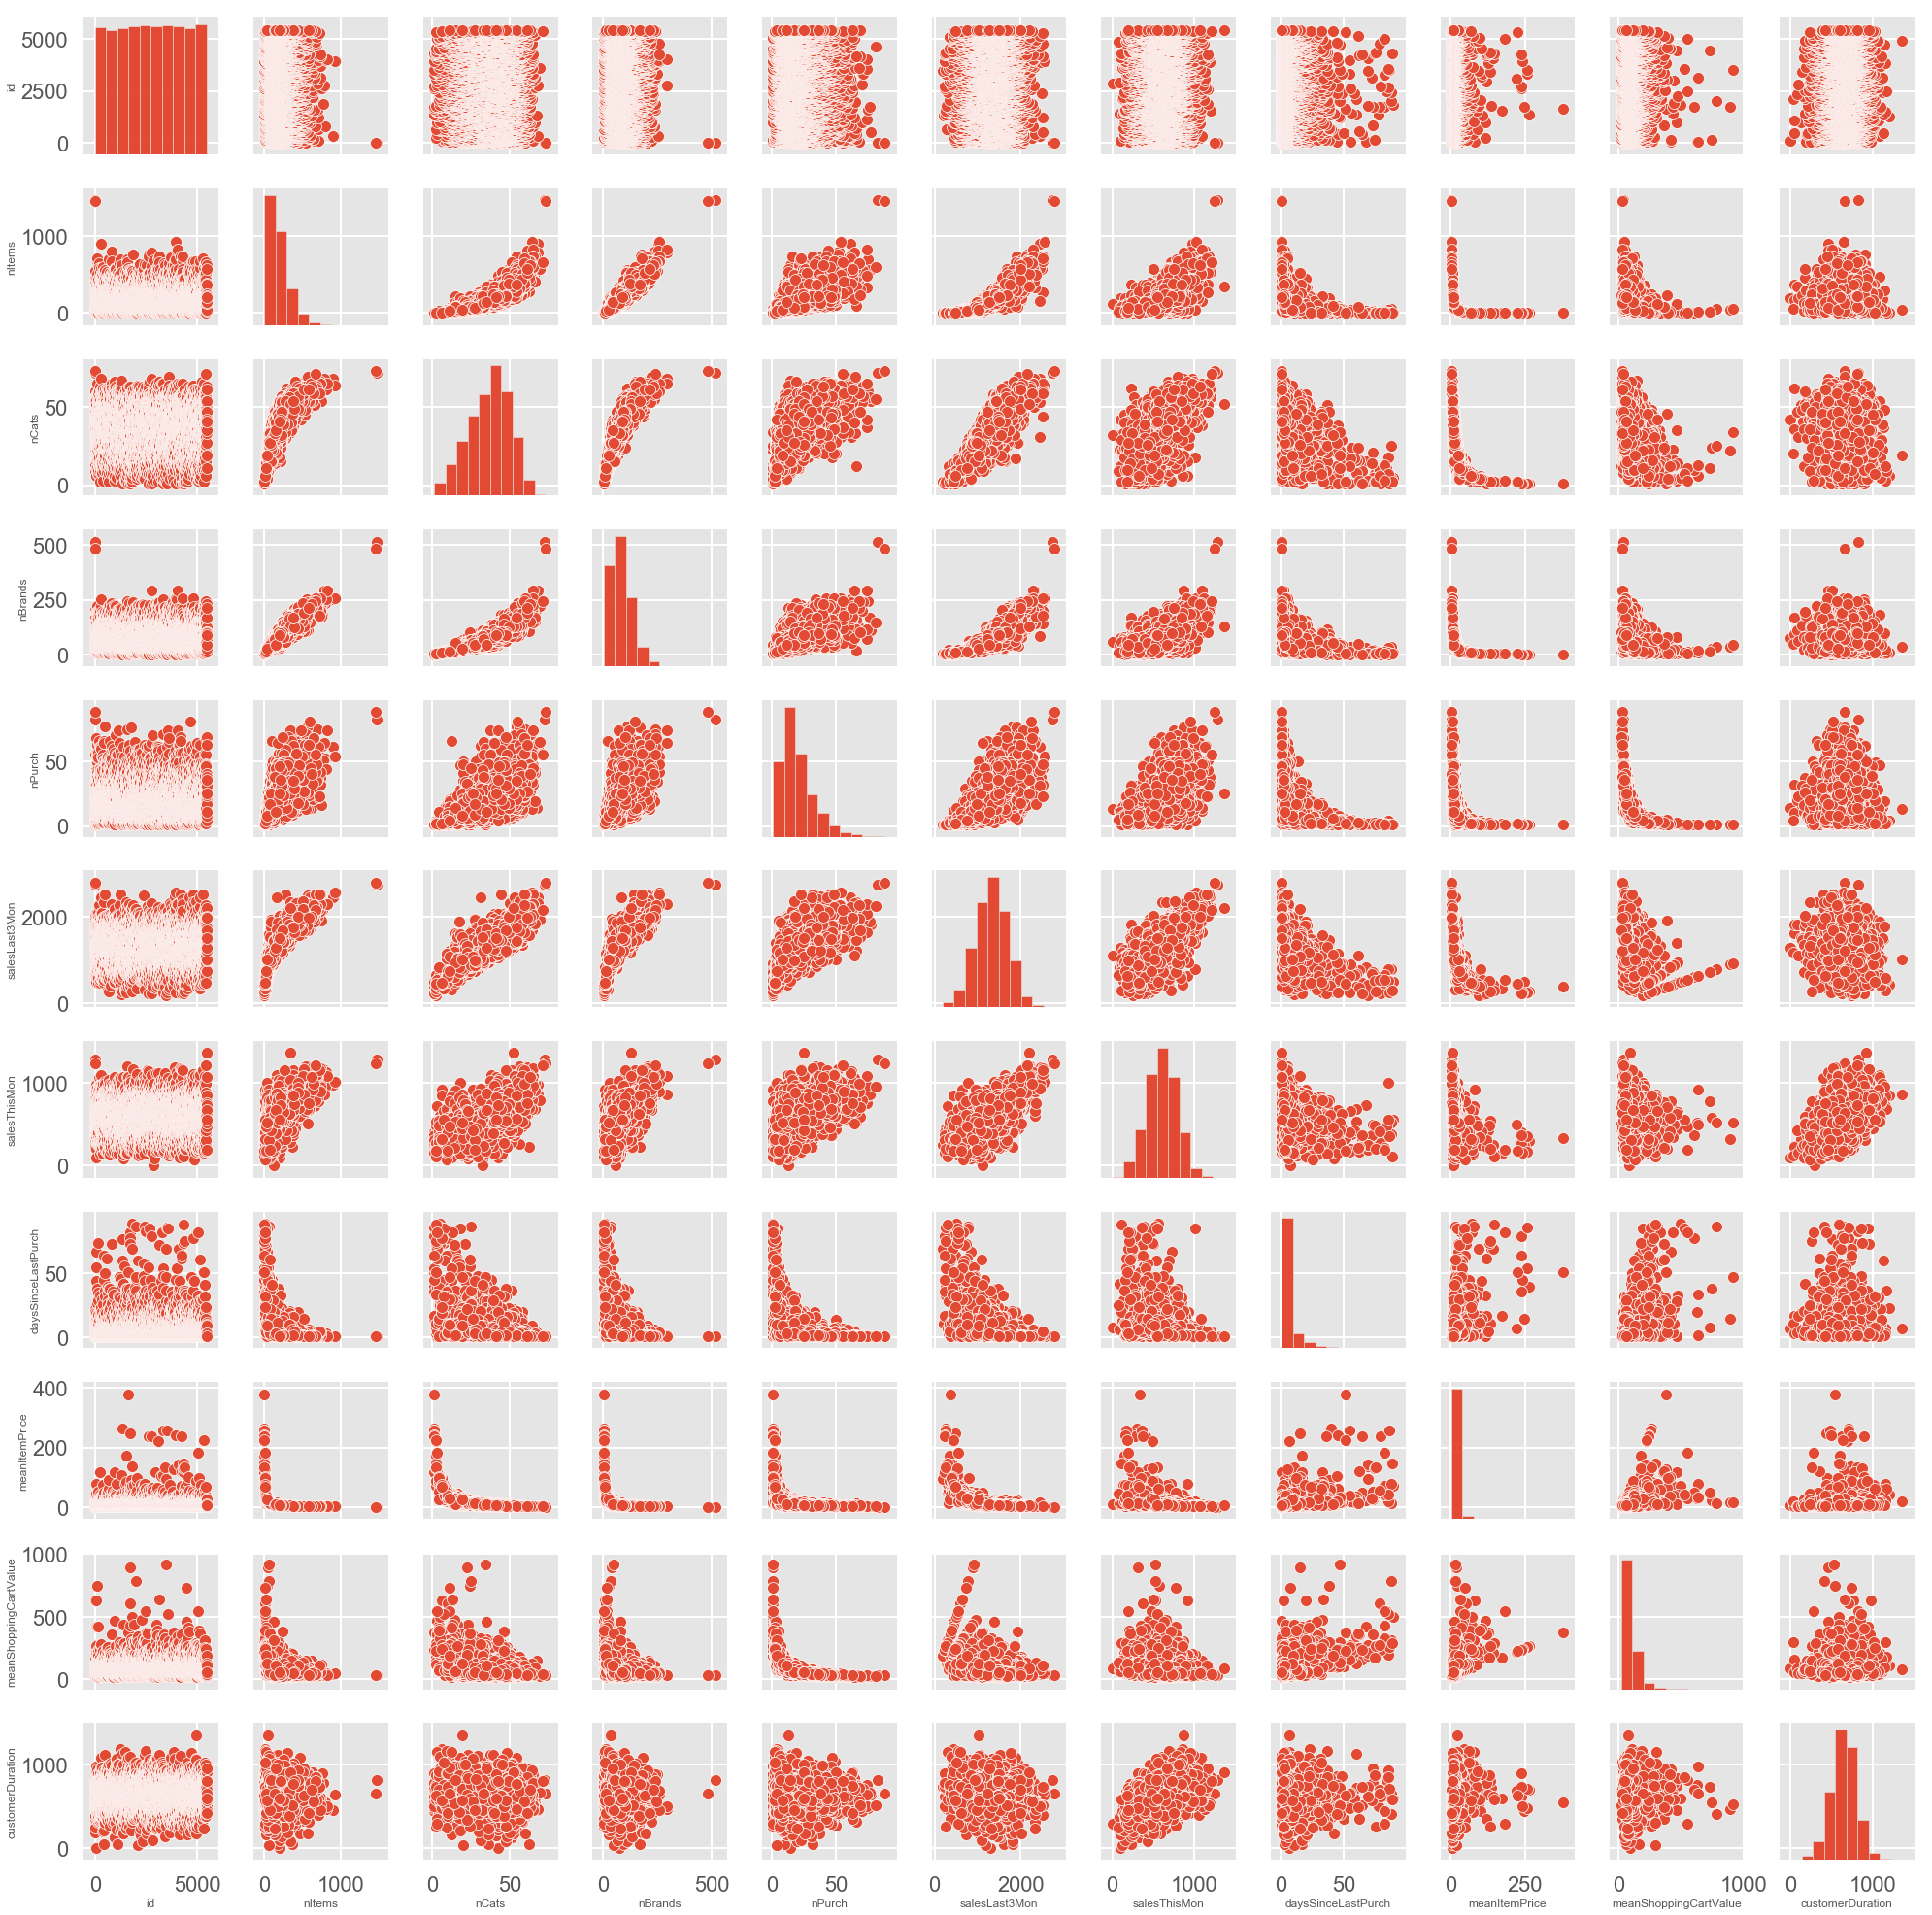

In [14]:
sns.pairplot(salesData)
plt.savefig('sales_pair.png', dpi=200)

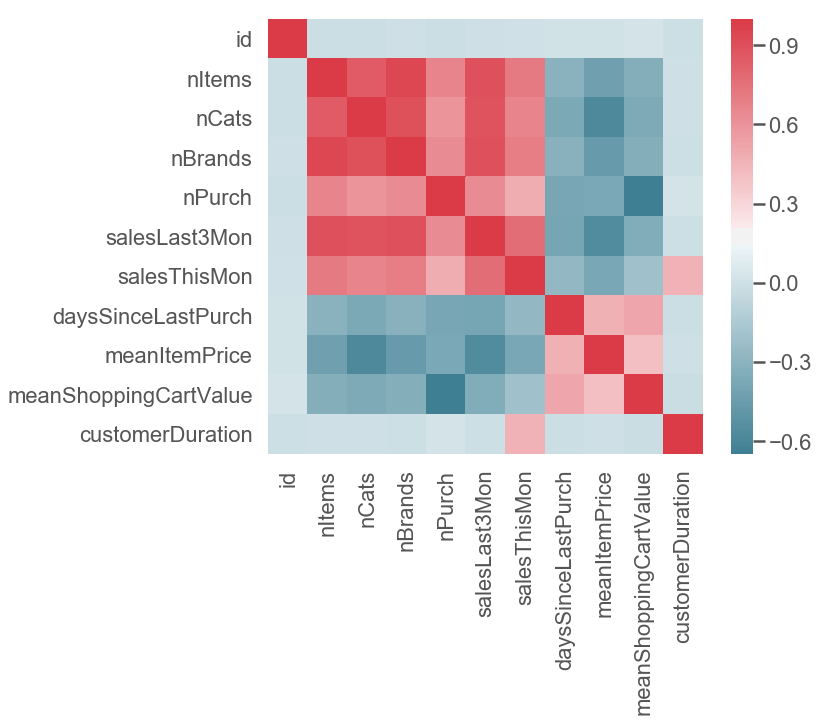

In [15]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = salesData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('sales_corr.png', dpi=200)

We will explore the distribution of sales for this month across other categorical variables. 

## Boxplots 

In [16]:
# Boxplots displaying the distribution of the salesThisMon dependent on the levels of the categorial variable preferredBrand. 
# The same has already been done for the categorial variable mostFreqStore.


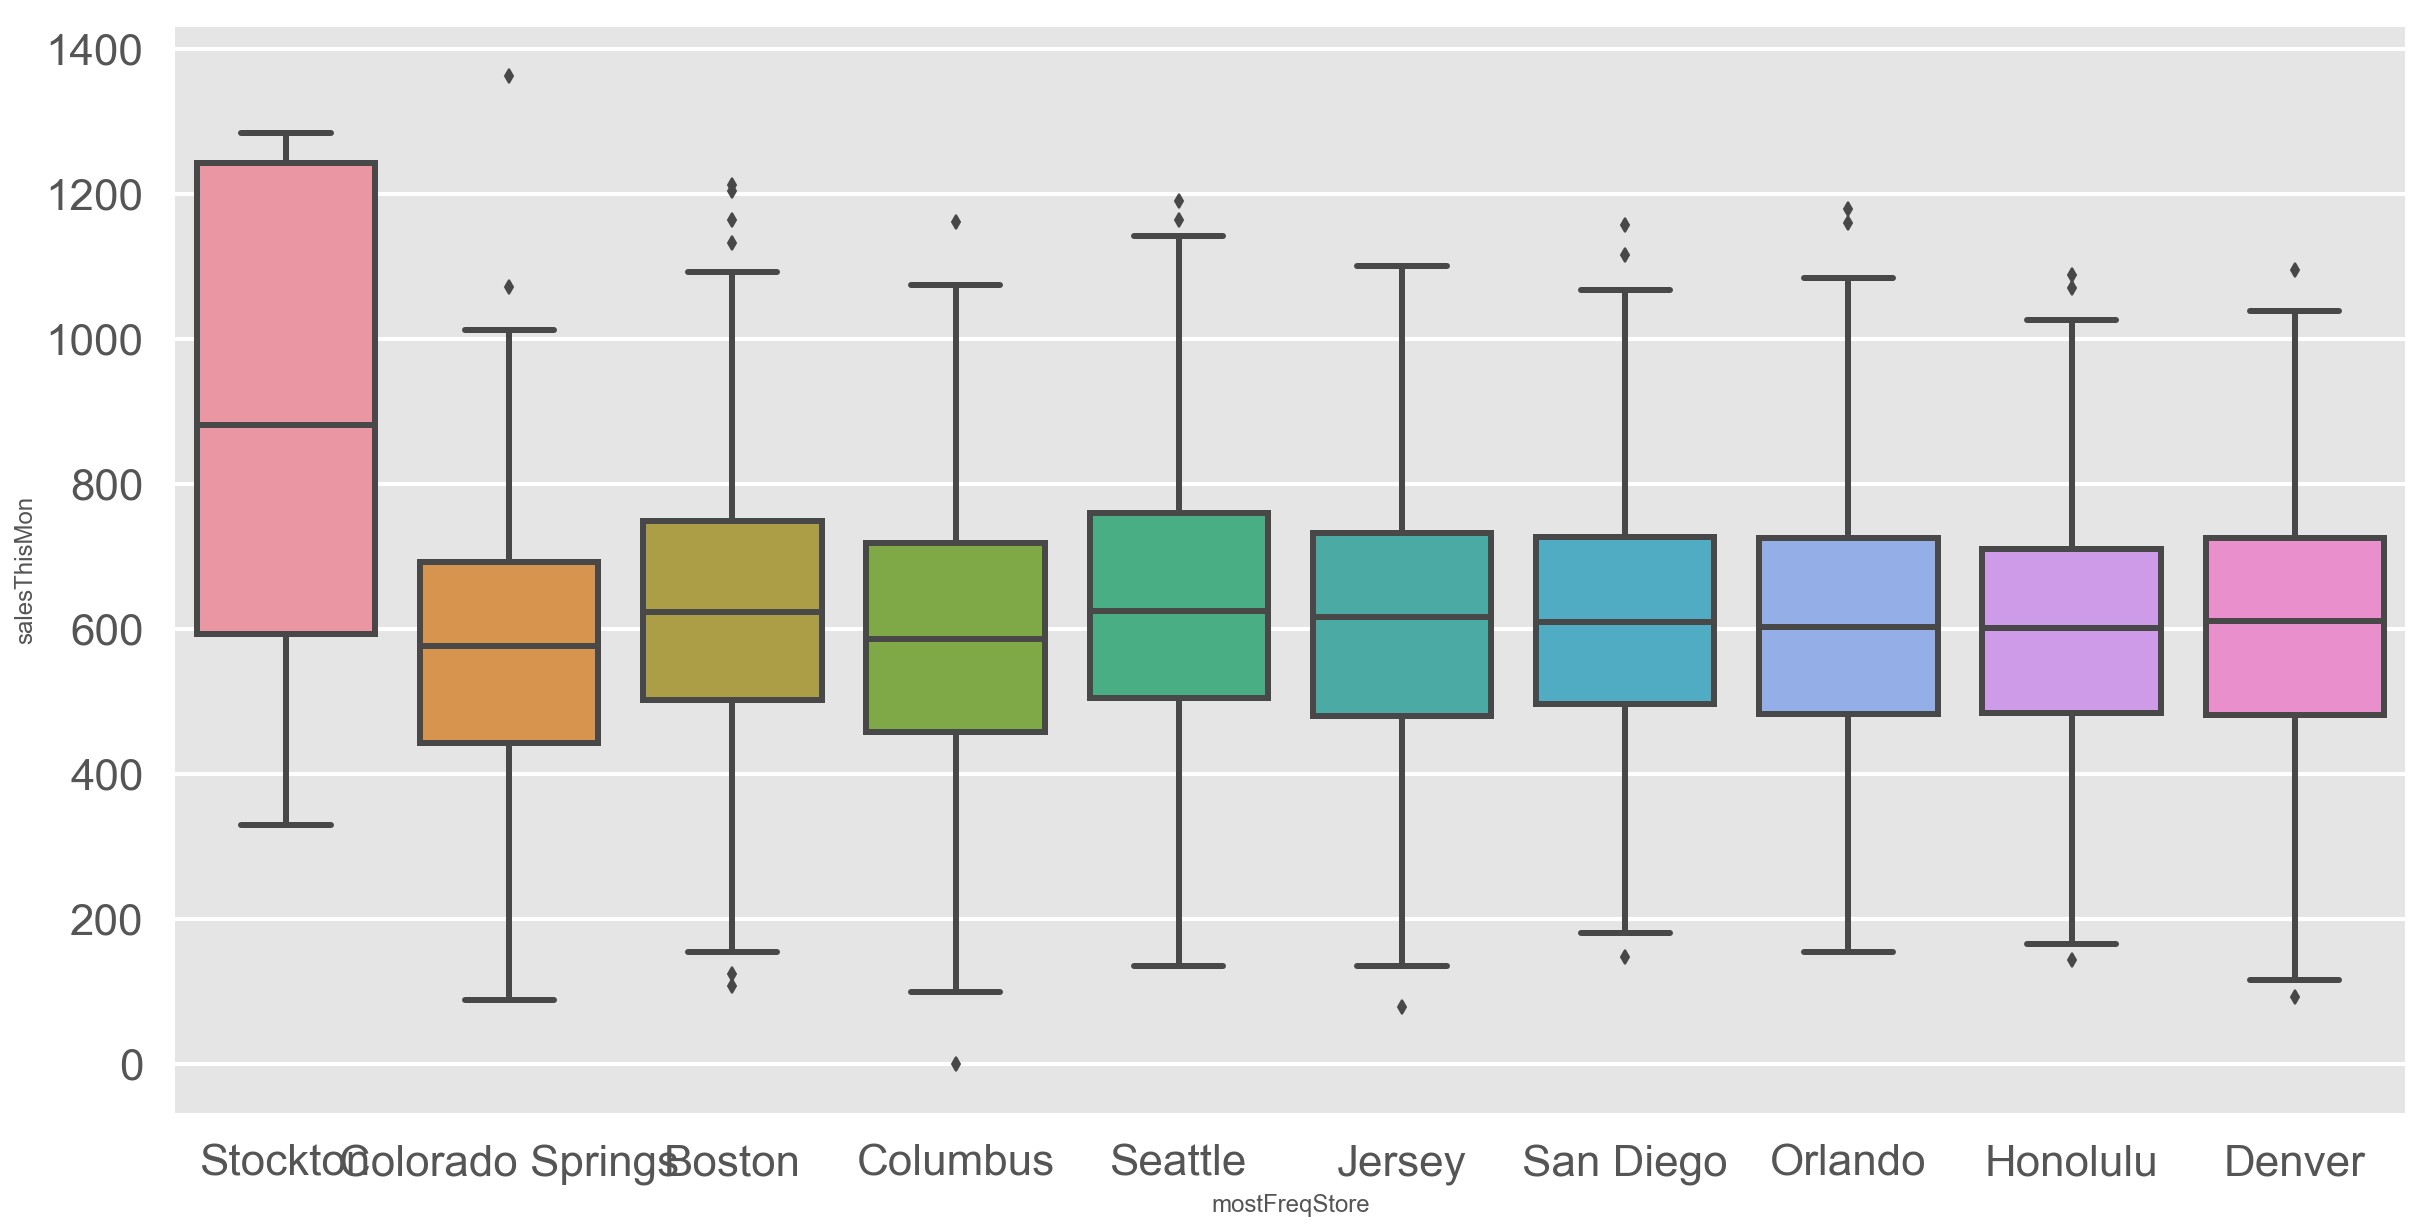

<Figure size 1440x720 with 0 Axes>

In [492]:
sns.boxplot (data=salesData, x = 'mostFreqStore',   y= 'salesThisMon')
plt.show()
plt.clf()
plt.savefig('salesthismonth_mostFreqStore.png', dpi=200)

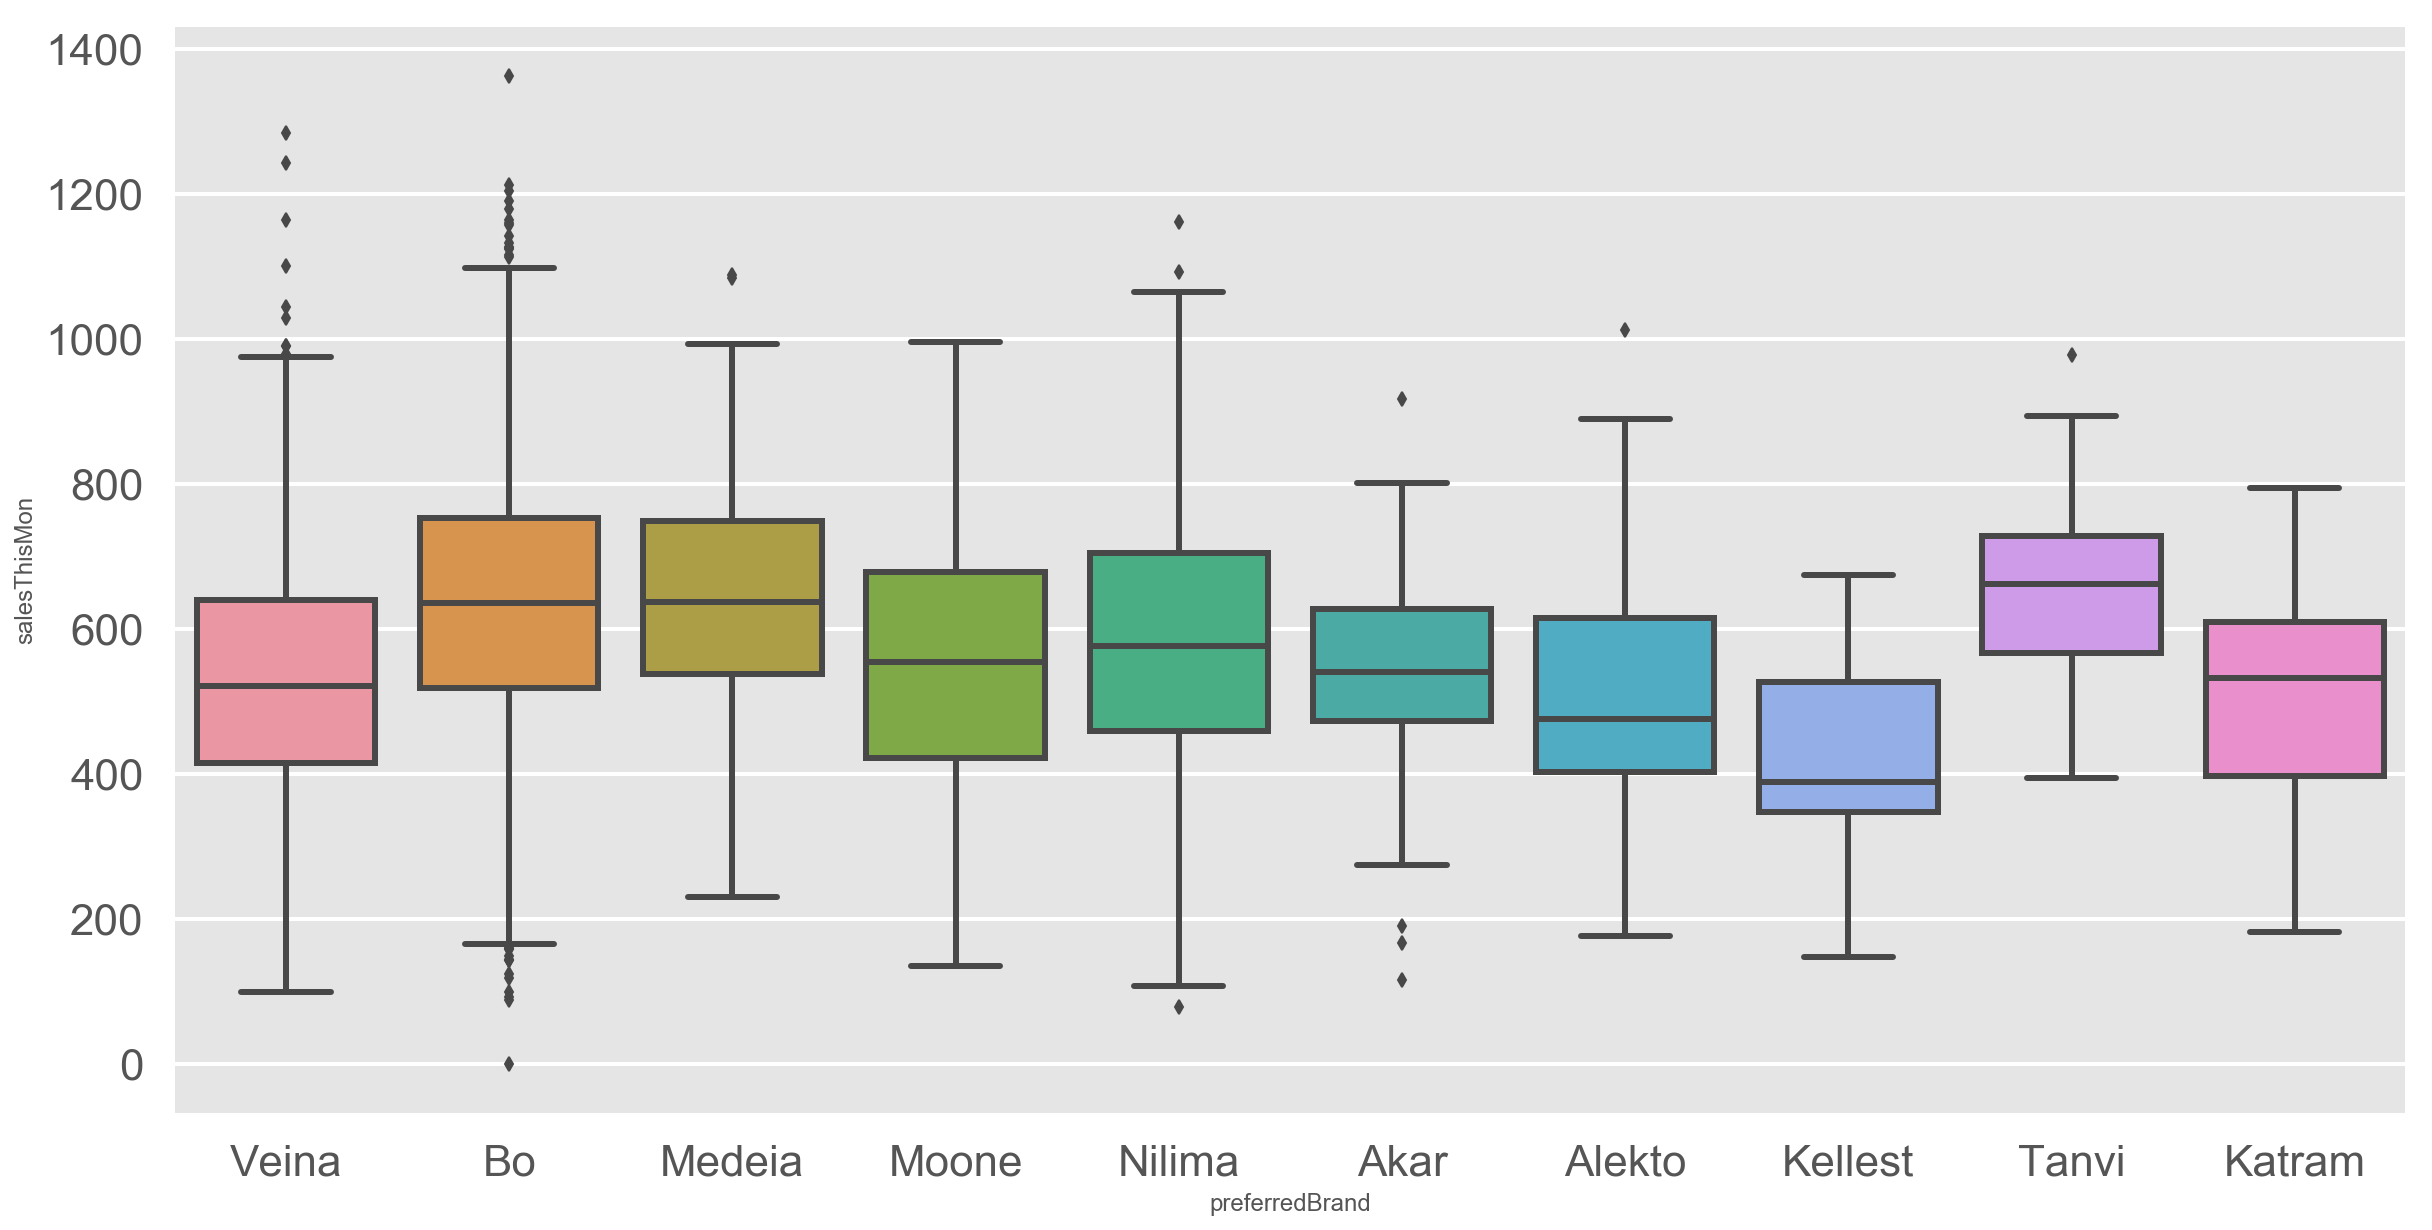

<Figure size 1440x720 with 0 Axes>

In [493]:
sns.boxplot (data=salesData, x = 'preferredBrand',   y= 'salesThisMon')
plt.show()
plt.clf()
plt.savefig('salesthismonth_preferredBrand.png', dpi=200)

## Scatterplots

We saw that the sales in the last three months are strongly positively correlated with the sales in this month. Hence we will start off including that as an explanatory variable in a linear regression.

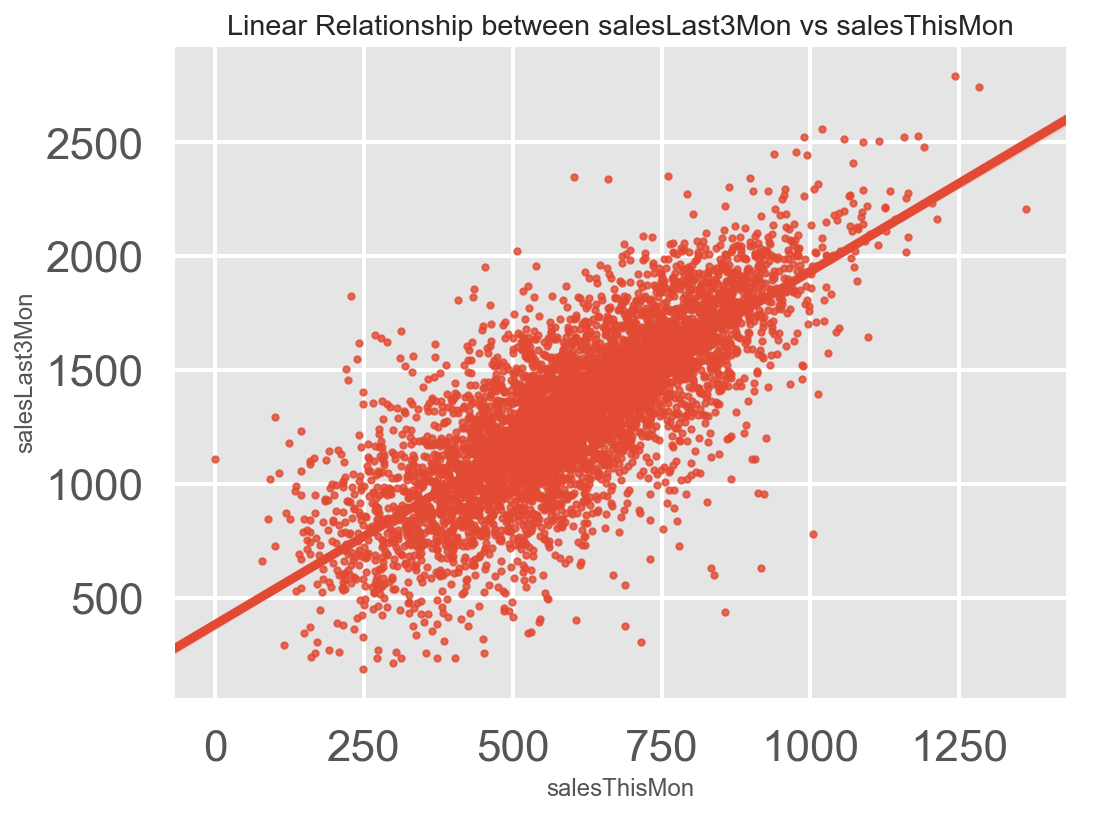

<Figure size 1440x720 with 0 Axes>

In [494]:
# Linear relationship between salesLast3Mon vs salesThisMon
plt.figure(figsize = (8,6))
sns.regplot(y="salesLast3Mon", x="salesThisMon", data=salesData, fit_reg = True,scatter_kws={"s": 10})
plt.title('Linear Relationship between salesLast3Mon vs salesThisMon')
plt.xlabel('salesThisMon' )
plt.ylabel('salesLast3Mon')
plt.show()
plt.savefig('sales3month_salesthismonth.png', dpi=200)

In [20]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
# creating a linear regression model m
m = ols('salesThisMon ~ salesLast3Mon',salesData).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           salesThisMon   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     7465.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        03:25:19   Log-Likelihood:                -31680.
No. Observations:                5122   AIC:                         6.336e+04
Df Residuals:                    5120   BIC:                         6.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        99.6905      6.084     16.386

In [22]:
# also provided in the summary, calculating the R^2. 
r_squared = m.rsquared
print ('R squared value:', r_squared)

R squared value: 0.5931735351518317


In [23]:
# also provided in the summary, calucualting the F statistic
f_statistic = m.fvalue
print ('F-statistics:', f_statistic)

F-statistics: 7465.218618731784


In [87]:
def results_summary_to_dataframe(results):
    '''This takes the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [88]:
results_summary_to_dataframe(m)

coeff         pvals  conf_lower  conf_higher
Intercept      99.690501  7.414926e-59   87.763484   111.617518
salesLast3Mon   0.382696  0.000000e+00    0.374013     0.391379

Please note that we get a warning from this model that the condition number is high and that there might be strong multicollinearity. We will look into this below. 

In the field of numerical analysis, the **condition number** of a function with respect to an argument measures how much the output value of the function can change for a small change in the input argument. This is used to measure how sensitive a function is to changes or errors in the input, and how much error in the output results from an error in the input. Very frequently, one is solving the inverse problem – given, f(x) = y, one is solving for x, and thus the condition number of the (local) inverse must be used. In linear regression the condition number of the moment matrix can be used as a diagnostic for multicollinearity.

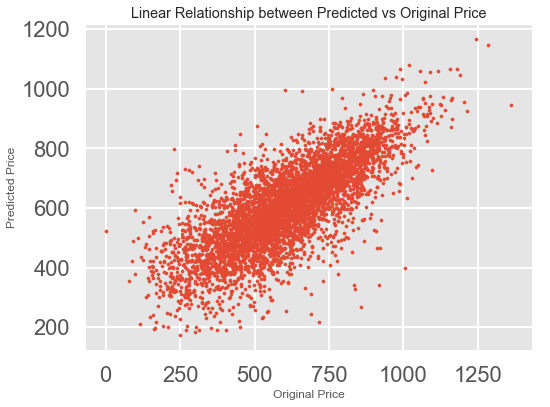

<Figure size 432x288 with 0 Axes>

In [26]:
# plotting original vs predicted price
plt.figure(figsize = (8,6))
plt.scatter(salesData.salesThisMon, m.fittedvalues,s=10)
plt.title('Linear Relationship between Predicted vs Original Price')
plt.xlabel('Original Price' )
plt.ylabel('Predicted Price')
plt.show()
plt.savefig('orig_pred1.png', dpi=200)

We see the that the predicted and original values show a linear relationship. This suggests that the model prediction is good, can we improve this model by including other explanatory vraiables. Next we will try and do multiple regression. 

## Muliple Regression to improve the model and prediction of sales. 

A multiple regression model, refers to regression models with only one dependent/outcome variable and many independent/predictor variables. source https://www.quora.com/What-is-multivariate-regression

Adding more variables to our analysis we will use lm() function from sklearn for multiple regression and ols() function from statsmodel. 

In [27]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 14 columns):
id                       5122 non-null int64
nItems                   5122 non-null int64
mostFreqStore            5122 non-null object
mostFreqCat              5122 non-null object
nCats                    5122 non-null int64
preferredBrand           5122 non-null object
nBrands                  5122 non-null int64
nPurch                   5122 non-null int64
salesLast3Mon            5122 non-null float64
salesThisMon             5122 non-null float64
daysSinceLastPurch       5122 non-null int64
meanItemPrice            5122 non-null float64
meanShoppingCartValue    5122 non-null float64
customerDuration         5122 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 560.3+ KB


In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf   # check out about smf (alias) and just ols. 

In [29]:
# Multivariate Analysis with all other variables using statsmodels
multiple_regression = smf.ols('salesThisMon ~ nItems + mostFreqStore + mostFreqCat + nCats + salesLast3Mon + preferredBrand + nBrands + nPurch + daysSinceLastPurch + meanItemPrice + meanShoppingCartValue + customerDuration', 
                          salesData).fit()
print(multiple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:           salesThisMon   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     665.6
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        03:26:14   Log-Likelihood:                -29521.
No. Observations:                5122   AIC:                         5.912e+04
Df Residuals:                    5085   BIC:                         5.936e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [30]:
# calculating the R^2. 
r_squared = multiple_regression.rsquared
print ('R squared value:', r_squared)

R squared value: 0.8249311034026737


In [89]:
# calcualting the F statistic
f_statistic = multiple_regression.fvalue
print ('F-statistics:', f_statistic)

F-statistics: 665.5752142177333


In [90]:
df_result = results_summary_to_dataframe(multiple_regression)

In [91]:
df_result[0:5]

coeff         pvals  conf_lower  \
Intercept                         -258.464856  9.051977e-48 -292.998921   
mostFreqStore[T.Colorado Springs]   -7.167351  9.950293e-02  -15.695731   
mostFreqStore[T.Columbus]            0.957909  7.946416e-01   -6.256467   
mostFreqStore[T.Denver]             -8.600555  9.372159e-02  -18.658300   
mostFreqStore[T.Honolulu]          -15.883297  1.241894e-03  -25.520908   

                                   conf_higher  
Intercept                          -223.930791  
mostFreqStore[T.Colorado Springs]     1.361029  
mostFreqStore[T.Columbus]             8.172285  
mostFreqStore[T.Denver]               1.457190  
mostFreqStore[T.Honolulu]            -6.245687

In [92]:
df_result.shape

(37, 4)

We will also perform multiple regression with lm() function. 

In [35]:
from sklearn.linear_model import LinearRegression
X = salesData.drop('salesThisMon', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
X = salesData.drop(['salesThisMon','id'],  axis = 1)

In [37]:
X.shape

(5122, 12)

We will create dummy variables using the get_dummies() function. This is essentially to convert categorical variable to binary. Please note that we need not convert into dummy variable when using statsmodel, its take care of it by itself. 

In statistics and econometrics, particularly in regression analysis, a dummy variable (also known as an indicator variable, design variable, one-hot encoding, Boolean indicator, binary variable, or qualitative variable is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. Dummy variables are used as devices to sort data into mutually exclusive categories (such as smoker/non-smoker, etc.) source: https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

In [38]:
X_dummy = pd.get_dummies(X)

In [39]:
X_dummy.head()

nItems  nCats  nBrands  nPurch  salesLast3Mon  daysSinceLastPurch  \
0    1469     72      517      82        2741.97                   1   
1    1463     73      482      88        2790.58                   1   
2     262     55      126      56        1529.55                   1   
3     293     50      108      43        1765.81                   1   
4     108     32       79      18        1180.00                  12   

   meanItemPrice  meanShoppingCartValue  customerDuration  \
0       1.866555              33.438659               821   
1       1.907437              31.711136               657   
2       5.837977              27.313393               548   
3       6.026655              41.065349               596   
4      10.925926              65.555556               603   

   mostFreqStore_Boston  ...  preferredBrand_Akar  preferredBrand_Alekto  \
0                     0  ...                    0                      0   
1                     0  ...                    0                      0   
2                     0  ...                    0                      0   
3                     0  ...                    0                      0   
4                     0  ...                    0                      0   

   preferredBrand_Bo  preferredBrand_Katram  preferredBrand_Kellest  \
0                  0                      0                       0   
1                  0                      0                       0   
2                  1                      0                       0   
3                  0                      0                       0   
4                  1                      0                       0   

   preferredBrand_Medeia  preferredBrand_Moone  preferredBrand_Nilima  \
0                      0                     0                      0   
1                      0                     0                      0   
2                      0                     0                      0   
3                      0                     0                      0   
4                      0                     0                      0   

   preferredBrand_Tanvi  preferredBrand_Veina  
0                     0                     1  
1                     0                     1  
2                     0                     0  
3                     0                     1  
4                     0                     0  

[5 rows x 39 columns]

In [40]:
# Use all 13 predictors to fit linear regression model
lm.fit(X_dummy, salesData.salesThisMon)  # getdummy variable in panda to conver categorical variable into numerical variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# predicting values of y
p_vector= lm.predict(X_dummy)

In [42]:
p_vector.shape

(5122,)

In [43]:
type(p_vector)

numpy.ndarray

In [44]:
np.mean(p_vector)

605.846192893401

Based on this model the predicted value of the target variable, here the sales will be 605 units. 

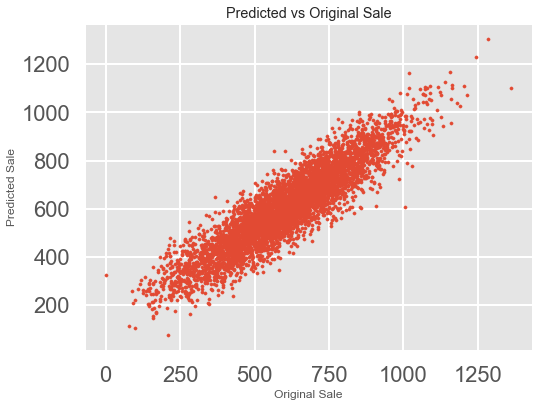

<Figure size 432x288 with 0 Axes>

In [45]:
# plotting predicted vs original sale
plt.figure(figsize = (8,6))
plt.scatter(x=salesData.salesThisMon, y=p_vector,s=10)
plt.title('Predicted vs Original Sale')
plt.xlabel('Original Sale' )
plt.ylabel('Predicted Sale')
plt.show()
plt.savefig('orig_pred1.png', dpi=200)

In [46]:
lm.score(X_dummy, salesData.salesThisMon)  # lm.score on features and labels (orignal data)

0.8249311034026737

We observe that the R2 score improved from 0.59 to 0.83. This model is much better than earlier model, but have we taken of collinearity problem which is usally assocaited with multiple regression. 

In [47]:
# Look inside lm object  pd.dataframe (lm.coef_).cols[X_dummy]  concate it... (did it in pca analysis)
lm.coef_

array([ 1.60454786e-01, -7.91673902e-01, -4.80380105e-02,  4.75843162e-01,
        3.75342522e-01,  1.79396091e-01,  1.79268083e-01,  2.59639126e-01,
        5.71289368e-01,  2.10417502e+01,  1.38743992e+01,  2.19996594e+01,
        1.24411955e+01,  5.15845308e+00, -6.43989604e-01,  1.05201319e+01,
        9.55875101e-01,  1.12581732e+01, -9.66056479e+01,  2.53390935e+00,
       -8.79450593e-01, -7.71637648e+00,  2.86896096e+00, -5.99318553e+00,
       -3.83787586e+00, -5.54976090e+00,  1.69927088e+00,  1.10421101e+01,
        5.83239811e+00,  2.26183463e+01,  1.70283462e+01, -2.43197526e+00,
       -4.00208490e+01, -3.08748844e+01,  1.01164505e+00, -1.90466369e+01,
       -6.25743920e+00,  5.39635663e+01,  4.00988086e+00])

**Multicollinearity**: is a state of very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.

## Avoiding multicollinearity: 
Multicollinearity can be detected with the help of tolerance and its reciprocal, called variance inflation factor (VIF). If the value of tolerance is less than 0.2 or 0.1 and, simultaneously, the value of VIF 10 and above, then the multicollinearity is problematic.

In [48]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dummy.values, i) for i in range(X_dummy.shape[1])]
vif["features"] = X_dummy.columns

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
vif[0:5]

VIF Factor       features
0   11.772600         nItems
1    8.402073          nCats
2   14.150868        nBrands
3    3.083952         nPurch
4    8.697663  salesLast3Mon

In [93]:
vif1 = pd.DataFrame()
variables = multiple_regression.model.exog  # from statsmodel

vif1["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif1["features"] = df_result.index

In [94]:
vif1[0:5]

VIF Factor                           features
0  265.702032                          Intercept
1    1.478098  mostFreqStore[T.Colorado Springs]
2    1.746101          mostFreqStore[T.Columbus]
3    1.289203            mostFreqStore[T.Denver]
4    1.338330          mostFreqStore[T.Honolulu]

In [95]:
len(list(df_result.index))

37

In [96]:
variables.shape

(5122, 37)

In [97]:
vif1.shape

(37, 2)

In [55]:
# getting the mean of all the vifs
np.array(vif1).mean()

12.072317876122348

The avg vif is 12.07 which is more than 10. 
We will remove preferredBrand & nBrands as vif associated with these two variables is more than 10. 

In [348]:
# Multiregression Analysis with variables using statsmodels after removing preferredBrand & nBrands
multiple_regression1 = smf.ols('salesThisMon ~ nItems + mostFreqStore + mostFreqCat + nCats + salesLast3Mon + nPurch + daysSinceLastPurch + meanItemPrice + meanShoppingCartValue + customerDuration', 
                          salesData).fit()
print(multiple_regression1.summary())
plt.savefig('Summary_multiregression.png', dpi=200)

                            OLS Regression Results                            
Dep. Variable:           salesThisMon   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     914.9
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:26:23   Log-Likelihood:                -29540.
No. Observations:                5122   AIC:                         5.913e+04
Df Residuals:                    5095   BIC:                         5.931e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

<Figure size 864x432 with 0 Axes>

In [57]:
# calculating the R^2. 
r_squared = multiple_regression1.rsquared
print ('R squared value:', r_squared)

R squared value: 0.8236021660495403


In [58]:
# calcualting the F statistic
f_statistic = multiple_regression1.fvalue
print ('F-statistics:', f_statistic)

F-statistics: 914.9451777545636


In [98]:
results_summary_to_dataframe(multiple_regression1)[0:5]

coeff          pvals  conf_lower  \
Intercept                         -282.825772  1.999368e-161 -302.572257   
mostFreqStore[T.Colorado Springs]   -7.828715   7.204725e-02  -16.359008   
mostFreqStore[T.Columbus]            0.596038   8.713908e-01   -6.621315   
mostFreqStore[T.Denver]             -9.720635   5.830489e-02  -19.783141   
mostFreqStore[T.Honolulu]          -16.038654   1.133834e-03  -25.692893   

                                   conf_higher  
Intercept                          -263.079286  
mostFreqStore[T.Colorado Springs]     0.701577  
mostFreqStore[T.Columbus]             7.813392  
mostFreqStore[T.Denver]               0.341871  
mostFreqStore[T.Honolulu]            -6.384415

Lets calcualte the mean vif with the new model. 

In [100]:
variables = multiple_regression1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif[0:5] 

[86.38701514726851,
 1.4705084748247852,
 1.7377898432520802,
 1.2832216554768034,
 1.3354567034431022]

In [101]:
# getting the mean of all the vifs
np.array(vif).mean()

5.216990132085457

In [63]:
vif in a table.. 


SyntaxError: invalid syntax (<ipython-input-63-036cd4b03df5>, line 1)

We see that the mean vif is 5.21 which is acceptable. We can now use this model to make future predictions. 

## Future predictions of sales

We will do the predictions on the a new dataset called **salesData2_4**. It contains information on the customers for the months two to four. We want to use this information in order to predict the sales for month 5.

In [102]:
# checking out the data
salesDataMon2To4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 13 columns):
id                       5173 non-null int64
nItems                   5173 non-null int64
mostFreqStore            5173 non-null object
mostFreqCat              5173 non-null object
nCats                    5173 non-null int64
preferredBrand           5173 non-null object
nBrands                  5173 non-null int64
nPurch                   5173 non-null int64
salesLast3Mon            5173 non-null float64
daysSinceLastPurch       5173 non-null int64
meanItemPrice            5173 non-null float64
meanShoppingCartValue    5173 non-null float64
customerDuration         5173 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 525.5+ KB


In [103]:
# dropping of id from the data frame
X1 = salesDataMon2To4.drop('id', axis = 1)

In [104]:
# creating a dummy table for categorial variables 
X1_dummy = pd.get_dummies(X1)

In [105]:
#checking the shape of the new dataframe
X1_dummy.shape

(5173, 39)

In [106]:
# predicting the sales using the lm model which we had created before, using salesData. 
p_vector1= lm.predict(X1_dummy)

In [107]:
print (np.mean(p_vector1))

625.0493902508778


**Conclusions from model**: Based on this model, we predict that our sales for the 5th month will be 625.04 units. 

## (II) Churn Prevention in Marketing using Logistic Regression
Keeping customers is less costly than finding new customers. 
We will use binary logistic regression to understand about customer behavior, whether or not they come back.  We will use churn_data for this excercise. The varbiable of interest is returnCustomer. 

**Churn Prevention*:  Simply put, customer churn occurs when customers or subscribers stop doing business with a company or service. Also known as customer attrition, customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers – earning business from new customers means working leads all the way through the sales funnel, utilizing your marketing and sales resources throughout the process. Customer retention, on the other hand, is generally more cost-effective as you’ve already earned the trust and loyalty of existing customers. Source: https://www.ngdata.com/what-is-customer-churn/

The dataset that we will useis about bank customers. We will be use to predict if customers will default on their loan payments.

In [108]:
defaultData.shape

(18000, 25)

In [109]:
defaultData.head()  

ID  limitBal  sex  education  marriage  age  pay1  pay2  pay3  pay4  ...  \
0   1     20000    2          2         1   24     2     2    -1    -1  ...   
1   2    120000    2          2         2   26    -1     2     0     0  ...   
2   3     90000    2          2         2   34     0     0     0     0  ...   
3   4     50000    2          2         1   37     0     0     0     0  ...   
4   5     50000    1          2         1   57    -1     0    -1     0  ...   

   billAmt4  billAmt5  billAmt6  payAmt1  payAmt2  payAmt3  payAmt4  payAmt5  \
0         0         0         0        0      689        0        0        0   
1      3272      3455      3261        0     1000     1000     1000        0   
2     14331     14948     15549     1518     1500     1000     1000     1000   
3     28314     28959     29547     2000     2019     1200     1100     1069   
4     20940     19146     19131     2000    36681    10000     9000      689   

   payAmt6  PaymentDefault  
0        0               1  
1     2000               1  
2     5000               0  
3     1000               0  
4      679               0  

[5 rows x 25 columns]

In [110]:
defaultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 25 columns):
ID                18000 non-null int64
limitBal          18000 non-null int64
sex               18000 non-null int64
education         18000 non-null int64
marriage          18000 non-null int64
age               18000 non-null int64
pay1              18000 non-null int64
pay2              18000 non-null int64
pay3              18000 non-null int64
pay4              18000 non-null int64
pay5              18000 non-null int64
pay6              18000 non-null int64
billAmt1          18000 non-null int64
billAmt2          18000 non-null int64
billAmt3          18000 non-null int64
billAmt4          18000 non-null int64
billAmt5          18000 non-null int64
billAmt6          18000 non-null int64
payAmt1           18000 non-null int64
payAmt2           18000 non-null int64
payAmt3           18000 non-null int64
payAmt4           18000 non-null int64
payAmt5           18000 non-null 

In [111]:
defaultData.describe()

ID        limitBal           sex     education      marriage  \
count  18000.000000    18000.000000  18000.000000  18000.000000  18000.000000   
mean    9000.500000   162902.426667      1.587556      1.835500      1.559500   
std     5196.296758   129503.322618      0.492288      0.767843      0.523585   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     4500.750000    50000.000000      1.000000      1.000000      1.000000   
50%     9000.500000   130000.000000      2.000000      2.000000      2.000000   
75%    13500.250000   230000.000000      2.000000      2.000000      2.000000   
max    18000.000000  1000000.000000      2.000000      6.000000      3.000000   

                age          pay1          pay2          pay3          pay4  \
count  18000.000000  18000.000000  18000.000000  18000.000000  18000.000000   
mean      35.475556      0.027833     -0.101667     -0.129389     -0.197389   
std        9.294161      1.120523      1.205068      1.214110      1.167596   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       75.000000      8.000000      8.000000      8.000000      8.000000   

       ...       billAmt4       billAmt5       billAmt6        payAmt1  \
count  ...   18000.000000   18000.000000   18000.000000   18000.000000   
mean   ...   41074.180056   39397.784333   38009.251611    5532.254278   
std    ...   61496.859401   59296.708143   58766.741569   15470.010126   
min    ... -170000.000000  -37594.000000 -339603.000000       0.000000   
25%    ...    2244.750000    1683.750000    1150.000000     949.000000   
50%    ...   18702.500000   18045.500000   16780.000000    2087.000000   
75%    ...   50540.250000   49355.250000   48442.250000    5000.000000   
max    ...  891586.000000  927171.000000  961664.000000  505000.000000   

            payAmt2        payAmt3        payAmt4        payAmt5  \
count  1.800000e+04   18000.000000   18000.000000   18000.000000   
mean   5.731058e+03    4629.137611    4757.224389    4763.706833   
std    2.187441e+04   15538.875970   15417.365689   15469.890364   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    6.960000e+02     307.000000     228.000000     209.750000   
50%    2.000000e+03    1500.000000    1486.000000    1500.000000   
75%    5.000000e+03    4000.000000    4000.000000    4000.000000   
max    1.684259e+06  896040.000000  497000.000000  417990.000000   

             payAmt6  PaymentDefault  
count   18000.000000    18000.000000  
mean     5134.710611        0.230556  
std     17745.237186        0.421200  
min         0.000000        0.000000  
25%         2.000000        0.000000  
50%      1400.000000        0.000000  
75%      4000.000000        0.000000  
max    528666.000000        1.000000  

[8 rows x 25 columns]

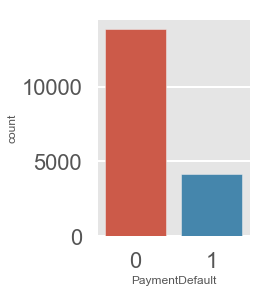

In [112]:
#looking at the number of customers which pay loan and which don't
fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(1,2,1)
ax= sns.countplot(x="PaymentDefault", data=defaultData)
plt.savefig('payment_default1.png', dpi=200)

In [113]:
#calculating how many pay loans and how many do not 
print(defaultData["PaymentDefault"].value_counts())

0    13850
1     4150
Name: PaymentDefault, dtype: int64


We can see that only 1/3 or the bank customers pay the loan rest default. 

We will now create a dataframe containing the target and another dataframe containing all the explanatory variables. 

In [114]:
# Import linear_model from sklearn.
from sklearn import linear_model

We will drop "ID" and the target column, "PaymentDefault" to create X_lg 

In [115]:
X_lg = defaultData.drop("ID", axis = 1)

In [116]:
X_lg = X_lg.drop("PaymentDefault", axis = 1)
y_lg = defaultData[["PaymentDefault"]]

In [117]:
X_lg.head()

limitBal  sex  education  marriage  age  pay1  pay2  pay3  pay4  pay5  ...  \
0     20000    2          2         1   24     2     2    -1    -1    -2  ...   
1    120000    2          2         2   26    -1     2     0     0     0  ...   
2     90000    2          2         2   34     0     0     0     0     0  ...   
3     50000    2          2         1   37     0     0     0     0     0  ...   
4     50000    1          2         1   57    -1     0    -1     0     0  ...   

   billAmt3  billAmt4  billAmt5  billAmt6  payAmt1  payAmt2  payAmt3  payAmt4  \
0       689         0         0         0        0      689        0        0   
1      2682      3272      3455      3261        0     1000     1000     1000   
2     13559     14331     14948     15549     1518     1500     1000     1000   
3     49291     28314     28959     29547     2000     2019     1200     1100   
4     35835     20940     19146     19131     2000    36681    10000     9000   

   payAmt5  payAmt6  
0        0        0  
1        0     2000  
2     1000     5000  
3     1069     1000  
4      689      679  

[5 rows x 23 columns]

In [118]:
logreg = linear_model.LogisticRegression()

In [119]:
logreg.fit(X_lg,y_lg)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
print(logreg.coef_)

[[-2.61518708e-06 -1.09522913e-03 -1.31409207e-03 -1.25489154e-03
  -1.62899067e-02  2.21686342e-03  1.65375068e-03  1.50201884e-03
   1.37931389e-03  1.34661433e-03  1.18315944e-03 -1.25210673e-05
   8.77427372e-06  1.40265524e-06  1.21867700e-06  4.10749751e-06
   1.36375938e-06 -3.87148006e-05 -1.46799327e-05 -8.51015622e-06
  -1.00342970e-05 -3.45921462e-06 -1.76733585e-06]]


In [121]:
Converting the coef into log odd ratio..... 

SyntaxError: invalid syntax (<ipython-input-121-c50ee30ba282>, line 1)

In [122]:
print(logreg.intercept_)

[-0.00061915]


In [123]:
# running the logistic regression with Stats model 
import statsmodels.api as sm
logit_model=sm.Logit(y_lg, X_lg)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.478629
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.114     
Dependent Variable: PaymentDefault   AIC:              17276.6520
Date:               2019-03-11 03:29 BIC:              17456.0090
No. Observations:   18000            Log-Likelihood:   -8615.3   
Df Model:           22               LL-Null:          -9719.0   
Df Residuals:       17977            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
limitBal      -0.0000    0.0000  -3.1405  0.0017  -0.0000  -0.0000
sex           -0.1543    0.0338  -4.5704  0.0000  -0.2204  -0.

In [124]:
#extract the coefficients and transform them to the odds ratios.
import numpy as np
print (np.exp(result.params))

limitBal     0.999999
sex          0.857032
education    0.857469
marriage     0.757175
age          0.999112
pay1         1.770041
pay2         1.050551
pay3         1.079338
pay4         0.988881
pay5         1.112817
pay6         0.982634
billAmt1     0.999992
billAmt2     1.000005
billAmt3     1.000000
billAmt4     1.000000
billAmt5     1.000001
billAmt6     1.000001
payAmt1      0.999981
payAmt2      0.999993
payAmt3      0.999997
payAmt4      0.999996
payAmt5      0.999998
payAmt6      0.999998
dtype: float64


## Coefficient Interpretation 

In [125]:
def results_summary_to_dataframe(results):
    '''This takes the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [126]:
results_summary_to_dataframe(result)

coeff          pvals    conf_lower   conf_higher
limitBal  -6.154139e-07   1.686732e-03 -9.994923e-07 -2.313355e-07
sex       -1.542805e-01   4.867597e-06 -2.204417e-01 -8.811929e-02
education -1.537707e-01   4.771308e-09 -2.052459e-01 -1.022955e-01
marriage  -2.781605e-01   3.018197e-22 -3.343658e-01 -2.219553e-01
age       -8.884416e-04   5.999998e-01 -4.209019e-03  2.432136e-03
pay1       5.710026e-01  4.514603e-146  5.275186e-01  6.144866e-01
pay2       4.931521e-02   5.321562e-02 -6.835901e-04  9.931401e-02
pay3       7.634758e-02   7.619232e-03  2.027155e-02  1.324236e-01
pay4      -1.118128e-02   7.333033e-01 -7.549791e-02  5.313535e-02
pay5       1.068950e-01   1.549138e-03  4.070563e-02  1.730843e-01
pay6      -1.751829e-02   5.234416e-01 -7.133110e-02  3.629452e-02
billAmt1  -8.019068e-06   4.313307e-07 -1.112854e-05 -4.909596e-06
billAmt2   4.929201e-06   1.428229e-02  9.860477e-07  8.872353e-06
billAmt3   4.715062e-07   7.823265e-01 -2.873313e-06  3.816326e-06
billAmt4  -2.456350e-08   9.895648e-01 -3.705560e-06  3.656433e-06
billAmt5   9.189481e-07   6.705869e-01 -3.315533e-06  5.153429e-06
billAmt6   7.515315e-07   6.385716e-01 -2.384480e-06  3.887543e-06
payAmt1   -1.921575e-05   4.885984e-09 -2.565261e-05 -1.277888e-05
payAmt2   -6.557935e-06   5.951053e-03 -1.123108e-05 -1.884794e-06
payAmt3   -3.340969e-06   1.663055e-01 -8.071720e-06  1.389783e-06
payAmt4   -3.972700e-06   9.111196e-02 -8.581205e-06  6.358041e-07
payAmt5   -2.388921e-06   2.731779e-01 -6.661884e-06  1.884041e-06
payAmt6   -1.965247e-06   2.262426e-01 -5.148315e-06  1.217821e-06

## Model Selection by using AIC (Step AIC function)

The stepAIC() function gives back a reduced model. 

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. source: 

In R we use stepAIC() function in R which performs stepwise model selection by AIC.

In python, we will use recursive feature elimination (RFE library) understand which variables are most important to build a better model. 

**Recursive Feature Elimination (RFE)** as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class). Scikit Learn does most of the heavy lifting just import RFE from sklearn.feature_selection and pass any classifier model to the RFE() method with the number of features to select. Using familiar Scikit Learn syntax, the .fit() method must then be called.


In [127]:
from sklearn.feature_selection import RFE
rfe = RFE(lm, 9)             # running RFE
rfe = rfe.fit(X_lg,y_lg)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False  True  True  True False  True  True  True  True  True  True False
 False False False False False False False False False False False]
[12  1  1  1  2  1  1  1  1  1  1  4  5 15 13 14 11  3  7 10  6  8  9]


/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
#features which are selected by the RFE
np.array(X_lg.columns)[rfe.support_]

array(['sex', 'education', 'marriage', 'pay1', 'pay2', 'pay3', 'pay4',
       'pay5', 'pay6'], dtype=object)

We observe that using RFE included the above 9 variables in our model. 

In [129]:
#
from sklearn.feature_selection import RFECV
rfecv = RFECV(lm, 9)             # running RFEcv
rfecv = rfe.fit(X_lg,y_lg)
print(rfecv.support_)           # Printing the boolean results
print(rfecv.ranking_)  

[False  True  True  True False  True  True  True  True  True  True False
 False False False False False False False False False False False]
[12  1  1  1  2  1  1  1  1  1  1  4  5 15 13 14 11  3  7 10  6  8  9]


/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
#features which are selected by the RFE
np.array(X_lg.columns)[rfecv.support_]

array(['sex', 'education', 'marriage', 'pay1', 'pay2', 'pay3', 'pay4',
       'pay5', 'pay6'], dtype=object)

In [131]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 9


## Model Evaluation 

We want to know how our model performs by calculating the accuracy. In order to do so, we first need a confusion matrix.

### Confusion matrix to know how the model performed when we included all the variables. 

In [132]:
# Create a dataframe new_data from current_data that has only the relevant predictors 
new_data = X_lg

# Make predictions using the full Model 
predictions = logreg.predict_proba(new_data)
print(predictions[0:5]) 

[[0.61800264 0.38199736]
 [0.68366527 0.31633473]
 [0.73744673 0.26255327]
 [0.68486694 0.31513306]
 [0.85083012 0.14916988]]


.........The predictions consist of two values. The second value is the probability and the observation is a target.

In [133]:
# Construct the in-sample confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_lg, logreg.predict(new_data)))

[[13847     3]
 [ 4149     1]]


The result is telling us that we have 13847+2 correct predictions and 4148+3 incorrect predictions. 

In [134]:
#Calcualting Accuracy for the full Model

In [135]:
from sklearn.metrics import accuracy_score
accuracyFull= accuracy_score(y_lg, logreg.predict(new_data))
accuracyFull
#print("Accuracy score : %d" %  accuracyFull)


0.7693333333333333

We now make new model with the variable we chose from RFE

In [136]:
# Create a dataframe new_data from current_data that has only the relevant predictors 
new_data1 = X_lg[['sex', 'education', 'marriage', 'pay1', 'pay2', 'pay3', 'pay4',
       'pay5', 'pay6']]
new_data1.head()

sex  education  marriage  pay1  pay2  pay3  pay4  pay5  pay6
0    2          2         1     2     2    -1    -1    -2    -2
1    2          2         2    -1     2     0     0     0     2
2    2          2         2     0     0     0     0     0     0
3    2          2         1     0     0     0     0     0     0
4    1          2         1    -1     0    -1     0     0     0

In [137]:
logreg_new = linear_model.LogisticRegression()

In [138]:
logreg_new.fit(new_data1, y_lg)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
# Make predictions using the new Model 
predictions = logreg_new.predict_proba(new_data1)
print(predictions[0:5]) 

[[0.55309251 0.44690749]
 [0.8836209  0.1163791 ]
 [0.81125776 0.18874224]
 [0.78406957 0.21593043]
 [0.87071586 0.12928414]]


In [140]:
.........The predictions consist of two values. The second value is the probability and the observation is a target.

SyntaxError: invalid syntax (<ipython-input-140-aa6b8cb03182>, line 1)

In sample prediction accuracy using confusion matrix and accuracy scores. 

In [141]:
# Construct the in-sample confusion matrix

print(confusion_matrix(y_lg, logreg_new.predict(new_data1)))

[[13472   378]
 [ 3170   980]]


The result is telling us that we have 13472+980 correct predictions and 3170+980 incorrect predictions.

In [142]:
# Calcualting Accuracy for the new Model
from sklearn.metrics import accuracy_score
accuracyFull= accuracy_score(y_lg, logreg_new.predict(new_data1))
accuracyFull

0.8028888888888889

Compare it to the full model's accuracy with the restricted accuracy we see that later has performed better. 

Are we overfitting our data? What does it mean for interpretations are concerned about the data? 

**Overfitting** happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

### Finding the Optimal Threshold
**Threshold**: 

Imagine you are running a campaign with the aim of preventing customers to default. You can lay out your campaign with the help of your predictions. Thereby, the choice of the threshold is essential for your results. If you know the costs and the rewards of your campaign, you can empirically check which threshold is most reasonable. (adapted example from Datacamp course)

We can build a for loop over the elements of the threshold sequence, which constructs a confusion matrix for each respective threshold value.

Can we use ROC curve here for tresholding?  precision and recall curve. 

https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

https://discuss.analyticsvidhya.com/t/threshold-for-logistic-regression/18481

in R: http://ethen8181.github.io/machine-learning/unbalanced/unbalanced.html

###  Assessing the model by out-of-sample fit

It makes more sense to look at the out-of-sample model fit than the in-sample fit. Therefore, we will come up with an out-of-sample accuracy measure.

First, split the dataset randomly into training and test set. The training set shall contain 2/3 of the overall data.

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(new_data1, y_lg, test_size=0.3, random_state=0)
logreg = LogisticRegression()

#run the model and call it logitTrainNew
logreg.fit(X_train, y_train)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
# predictions on the test set 
y_pred_train = logreg.predict(X_train) 
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [145]:
# Make predictions using the new Model 
predictions = logreg_new.predict_proba(X_test)
print(predictions[0:5]) 

[[0.7915258  0.2084742 ]
 [0.82253876 0.17746124]
 [0.6754662  0.3245338 ]
 [0.47474948 0.52525052]
 [0.91354492 0.08645508]]


............The predictions consist of two values. The second value is the probability and the observation is a target.

In [146]:
# calculate the out-of-sample accuracy with confusion matrix
print(confusion_matrix(y_test, y_pred_test))

[[4032  136]
 [ 939  293]]


In [147]:
# compare this value to the in-sample accuracy
accuracy_tt= accuracy_score(y_test, y_pred_test)
accuracy_tt

0.8009259259259259

### Cross Validation  
Cross-validation, sometimes called rotation estimation, or out-of-sample testing is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set). The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias[6] and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem). source: Wiki https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Cross validation is a clever method to avoid overfitting. 

In [148]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, new_data1, y_lg)
scores.mean()

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8008338389058783

In [149]:
# calculate the cross validated accuracy.

In [150]:
scores = cross_val_score(logreg, new_data1, y_lg, cv=5)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [151]:
scores

array([0.79666667, 0.79972222, 0.80055556, 0.80222222, 0.80916667])

We can find a mean of 5 fold cross validation

In [152]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.01)


**Conclusion**: Comparing the cross validation score with in sample validation score we find that these are similar. Hence we can choose the above model for robust analyses.  

# (III) Survival Analysis in Customer Relationship Management

Why survival analysis? We conduct survival analysis to study customer relationship when we have censored data or missing data. Logistic regression cannot handle the censerode data or the missing data. 

Advantages of survival analysis: 
Allows for model time of an event thus avoids loss of function due to aggregation, 

allows us to model ""when"" an event take place and not just if it will take place, 

no arbitary set time frame, 

provides deeper insights into customer relationships. 


Censoring: attach figure. 

Survival analysis is generally defined as a set of methods for analyzing data where the outcome variable is the time until the occurrence of an event of interest. The event can be death, occurrence of a disease, marriage, divorce, etc. The time to event or survival time can be measured in days, weeks, years, etc.

https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e



## Modeling Time to Reorder with Survival Analysis

Survival analysis is a set of statistical methods for analyzing the occurrence of events over time. It is also used to determine For example:

1)  Time to death in biological systems

2) Failure time in mechanical systems

3) How long can we expect a user to be on a website / service?

4) Time to recovery for lung cancer treatment

5) After ordering for the first time in an online shop, when do customers place their second order?

A good resource for Survivial analysis using Lifelines  https://lifelines.readthedocs.io/en/latest/


## Data for Survival Analysis 

We will use "survivalDataExercisedata" about customers of an online shop in order to practice survival analysis. Here we are not looking at when they will churn but rather the time it will take them until the second order.

In [153]:
survivalDataExercise.head()

daysSinceFirstPurch  shoppingCartValue  gender  voucher  returned  \
0                   37              33.44    male        0         0   
1                   63              31.71    male        1         0   
2                   48              27.31  female        0         0   
3                   17              41.07    male        0         0   
4                   53              65.56  female        0         0   

   boughtAgain  
0            0  
1            1  
2            0  
3            1  
4            0

Note: 

- The variable boughtAgain takes the value 0 for customers with only one order and 1 for customers who have placed a second order already. 

- If a person has ordered a second time, you see the number of days between the first and second order in the variable daysSinceFirstPurch. For customers without a second order, daysSinceFirstPurch contains the time since their first (and most recent) order.

Creating a dataframe with "daysSinceFirstPurch" and "boughtAgain" variable to analyze churn. 

Preparing the data for Survival Analysis: We need two columns into considerations to build the model. 
- Time under obsetvation: "daysSinceFirstPurch"
    
- Status at the end of this time: "boughtAgain" This will help us with knowing whether the observation was censored or not. 

We covariates, we need more information about the subject. 

In [154]:
dataNextOrder = survivalDataExercise[['daysSinceFirstPurch','boughtAgain']]

In [155]:
dataNextOrder.head()

daysSinceFirstPurch  boughtAgain
0                   37            0
1                   63            1
2                   48            0
3                   17            1
4                   53            0

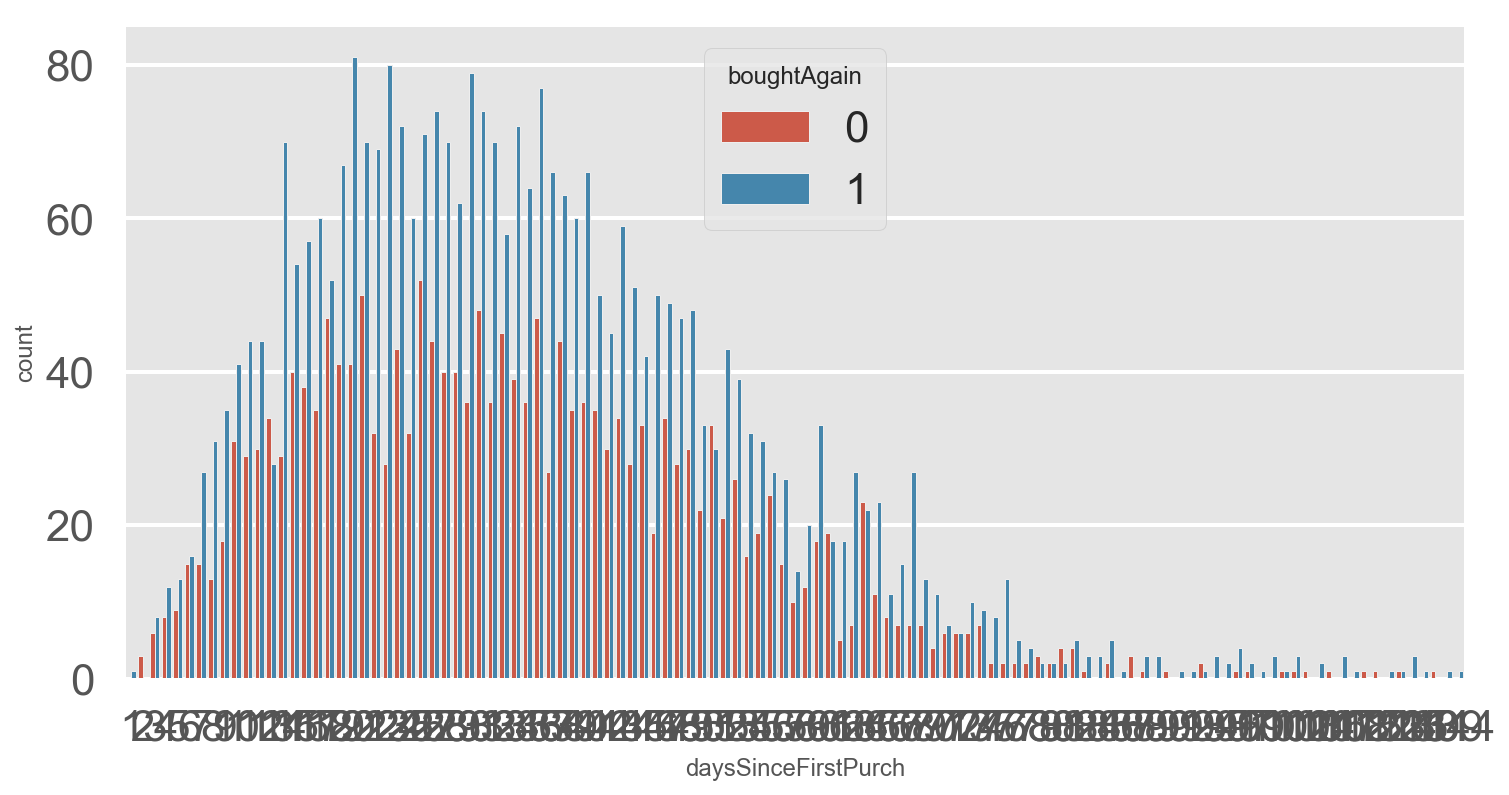

In [349]:
# Plot to see of the days since the first purchase separately for customers with vs. without a second order.
ax= sns.countplot(x="daysSinceFirstPurch", hue="boughtAgain", data=dataNextOrder) # facet
plt.savefig('survivaldata_boughtagain.png', dpi=200)

In [534]:
#g = sns.FacetGrid(dataNextOrder, row="daysSinceFirstPurch", hue = "boughtAgain")
# g.map(plt.hist, "boughtAgain");

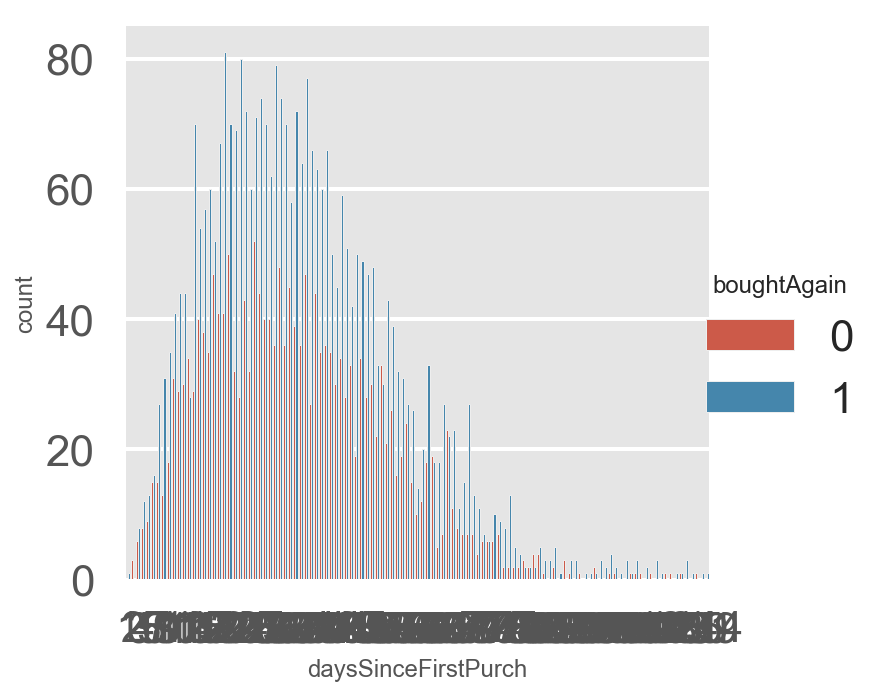

In [350]:
# get the new version 
g = sns.catplot(x="daysSinceFirstPurch", hue="boughtAgain", data= dataNextOrder, kind="count")
plt.savefig('survivaldata_boughtagain1.png', dpi=200)

In [159]:
..... try plotting in as 2 histograms next to each other. 

SyntaxError: invalid syntax (<ipython-input-159-068f1d0220e2>, line 1)

**Observations**: We see that there are more customers in the data who bought a second time. Apart from that, the differences between the distributions are not very large.

**Note**: Transforming the data into the right format for analysis is required in R but not with lifelive library in Python 

## Survival analysis using Kaplan-Meier Fitting - without and with a categorical covariate

There are two main methods to estimate the survival curve. The ﬁrst method is a parametric approach. This method assumes a parametric model, which is based on certain distribution such as exponential distribution, then we estimate the parameter, and then finally form the estimator of the survival function. 

A second approach is a powerful non-parametric method called the Kaplan-Meier estimator. Kaplan-Meier analysis allows estimation of survival over time, even when pts drop out or are studied for different lengths of time.

How does it wor?

For each interval, survival probability is calculated as 

No. of points surviving divided by no. of points at risk. 

Pts who have died, dropped out, or not reached the time yet are not counted as “at risk.” 

Pts who are lost are considered “censored” & are not counted in the denominator.

• Probability of surviving to any point is estimated from cumulative probability of surviving each of the preceding time intervals (calculated as the product of preceding probabilities).

• Although the probability calculated at any given interval isn’t very accurate because of the small no. of events, the overall probability of surviving to each point is more accurate.

source: 
- http://savvastjortjoglou.com/nfl-survival-analysis-kaplan-meier.html
- http://biostat.mc.vanderbilt.edu/wiki/pub/Main/ClinStat/km.lam.pdf

We will use KM analysis from lifeline library to analyze the data. 

In [220]:
# Load python libraries
import lifelines as ll

# Plotting helpers
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls   
from plotly.graph_objs import *

from lifelines.plotting import plot_lifetimes   # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['contour', 'scatter', 'Figure', 'bar', 'histogram', 'table', 'box', 'Annotation', 'pie', 'histogram2d']
`%matplotlib` prevents importing * from pylab and numpy



In [221]:
from lifelines.estimation import KaplanMeierFitter
# https://www.youtube.com/watch?v=XQfxndJH4UA  lifeline lecture by Cameron Davidson-Pilon. 

# interest (or death) occured.
kmf = KaplanMeierFitter() # instantiate the class to create an object

We can then fit the data by calling the KaplanMeierFitters fit method.

In [222]:
# The 1st arg accepts an array or pd.Series of individual survival times, here is it is days since first purchase
# The 2nd arg accepts an array or pd.Series that indicates if the event interest (or death) occured, here "boughtAgain"
kmf.fit(dataNextOrder['daysSinceFirstPurch'],dataNextOrder['boughtAgain'],label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter: fitted with 5122 observations, 1923 censored>

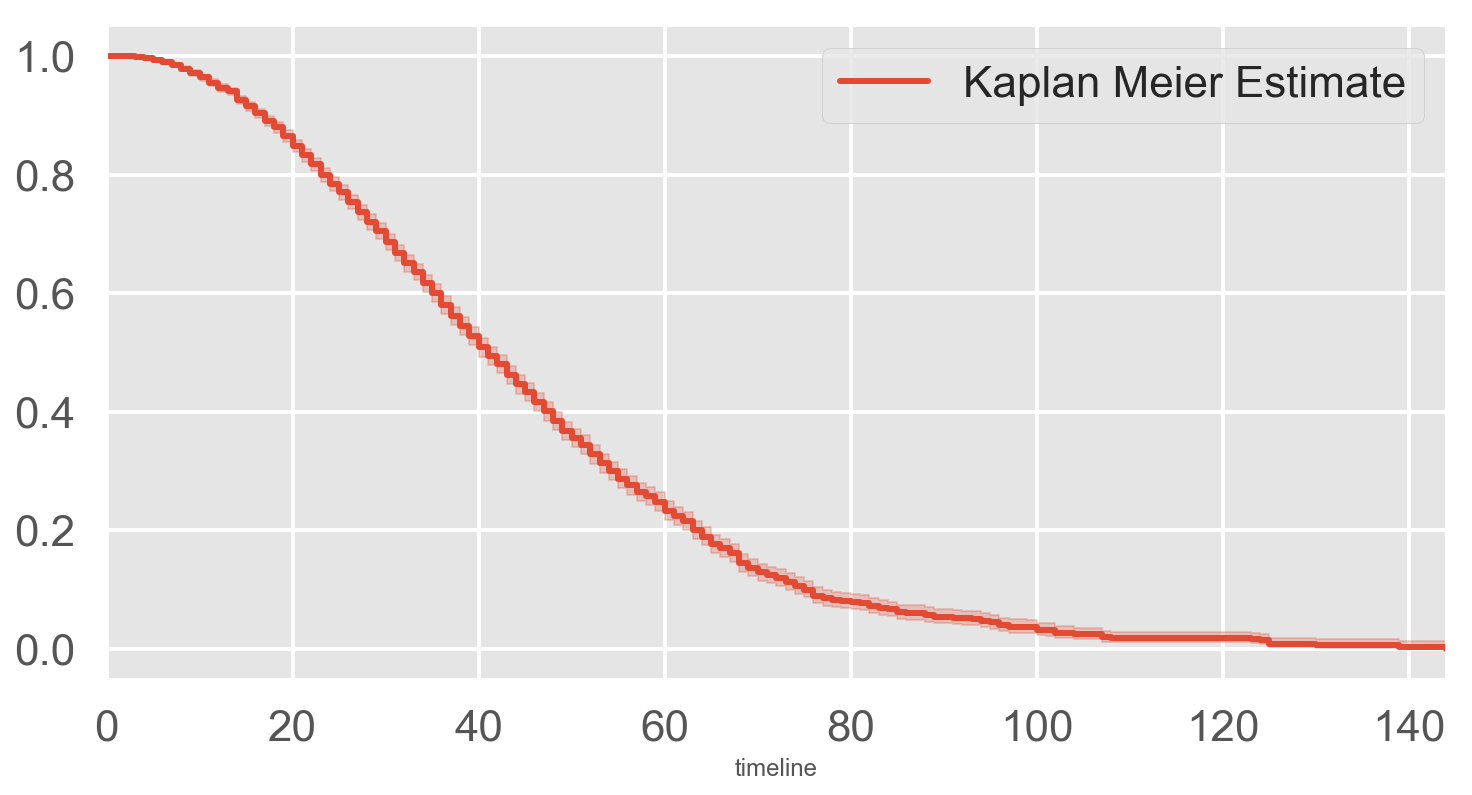

In [351]:

kmf.plot() 
# default ci_show= TRUE 
# ci_show is meant for Confidence interval, if our data set is too tiny, we will not use it. 
plt.savefig('Nextorder_kmf.png', dpi=200)

 Interpretation of Kaplan-Meier Curves
 
• Vertical axis represents estimated probability of survival for a hypothetical cohort, not actual % surviving.

• Precision of estimates depends on # observations; therefore, estimates at left-hand side are more precise than at right-hand side (because of small #’s due to deaths and dropouts).

• Curves may give the impression that a given event occurs more frequently early than late, because of high survival rate and large # people at beginning.

## Observation from KM analysis: 
After fitting our data we can access the event table that contains a information regarding the subjects (the customers) at each time period.

In [224]:
kmf.event_table[0:5]  
# details about each column source: http://savvastjortjoglou.com/nfl-survival-analysis-kaplan-meier.html

removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0      5122     5122
1.0             1         1         0         0     5122
2.0             3         0         3         0     5121
3.0            14         8         6         0     5118
4.0            20        12         8         0     5104
5.0            22        13         9         0     5084

In [225]:
len(kmf.event_table)

116

To get the full list of estimated probabilities from our KaplanMeierFitter, access the survival_function_ attribute.

In [226]:
kmf.survival_function_[0:5]

Kaplan Meier Estimate
timeline                       
0.0                    1.000000
1.0                    0.999805
2.0                    0.999805
3.0                    0.998242
4.0                    0.995895
5.0                    0.993348

In [227]:
kmf.median_

41.0

# Inclusion of a covariate in survival analysis

Now we will include a co-variate "**voucher**": This categorical variable tells you if the customer used a voucher in her first order. It contains the value 0 or 1.

For this excericse we will create a new data set which includes voucher. 

In [228]:
dataNextOrder_1= survivalDataExercise[['daysSinceFirstPurch', 'shoppingCartValue', 'gender', 'voucher', 'returned', 'boughtAgain']]

In [229]:
dataNextOrder_1.head()

daysSinceFirstPurch  shoppingCartValue  gender  voucher  returned  \
0                   37              33.44    male        0         0   
1                   63              31.71    male        1         0   
2                   48              27.31  female        0         0   
3                   17              41.07    male        0         0   
4                   53              65.56  female        0         0   

   boughtAgain  
0            0  
1            1  
2            0  
3            1  
4            0

In [230]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

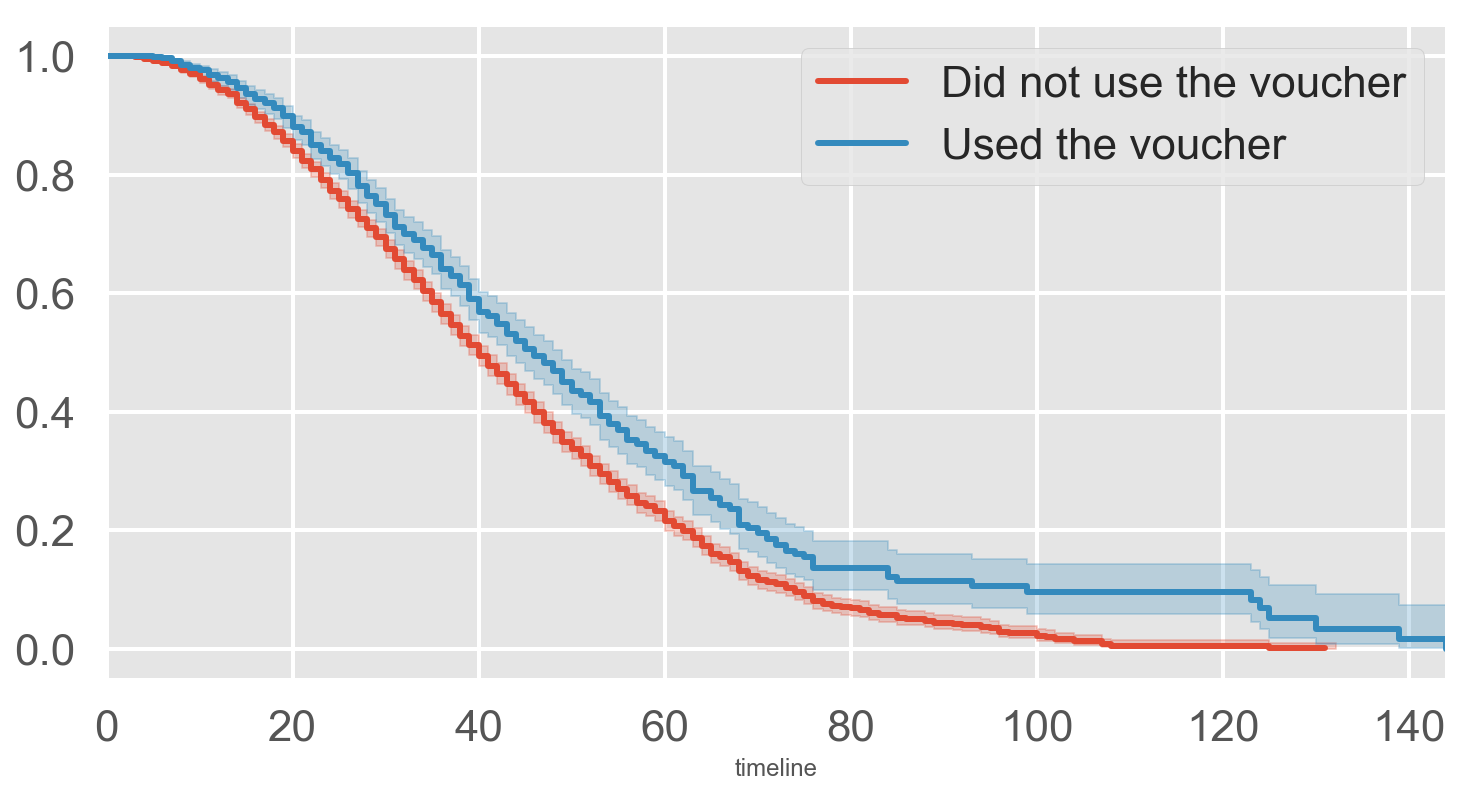

In [352]:
T = dataNextOrder_1['daysSinceFirstPurch']     ## time to event
E = dataNextOrder_1['boughtAgain']      ## event occurred or censored

## Two Cohorts are compared. Cohort 1. did not use the vouchers, and Cohort  2. use the vouchers
groups = dataNextOrder_1['voucher']   
i1 = (groups == 0)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 1)     ## group i2 , having the pandas series  for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Did not use the voucher')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Used the voucher')
kmf1.plot(ax=a1)
plt.savefig('Nextorder_kmf1.png', dpi=200)

Customers using a voucher seem to take longer to place their second order. They are maybe waiting for another voucher.

In [232]:
kmf1.confidence_interval_[0:5]

Used the voucher_upper_0.95  Used the voucher_lower_0.95
0.0                          NaN                          NaN
3.0                          NaN                          NaN
4.0                          NaN                          NaN
5.0                     0.999863                     0.993141

In [233]:
kmf1.median_ 

46.0

In [ ]:
Calculating individual means...... 

## Cox PH Model with Constant Covariates

**Why Cox propotional hazard (PH) function in Survival Analysis?**

Kaplan-Meier curves and logrank tests are useful only when the predictor variable is categorical (e.g.: treatment A vs treatment B; males vs females). They don’t work easily for quantitative predictors such as gene expression, weight, or age.

An alternative method is the Cox proportional hazards regression analysis, which works for both quantitative predictor variables and for categorical variables. Furthermore, the Cox regression model extends survival analysis methods to assess simultaneously the effect of several risk factors on survival time.

Note: The coefficients in Cox PH model are interpreted similar to logistic regression model. 

In [297]:
## import the CoxPHFitter model from lifeline
from lifelines import CoxPHFitter

In [301]:
## We will include shoppingCartValue, voucher, returned and gender as predictors
dataNextOrder_1.head()

daysSinceFirstPurch  shoppingCartValue  gender  voucher  returned  \
0                   37              33.44    male        0         0   
1                   63              31.71    male        1         0   
2                   48              27.31  female        0         0   
3                   17              41.07    male        0         0   
4                   53              65.56  female        0         0   

   boughtAgain  
0            0  
1            1  
2            0  
3            1  
4            0

In [302]:
## Create dummy variables 
df_dummy = pd.get_dummies(dataNextOrder_1, drop_first=True)
df_dummy.head()

daysSinceFirstPurch  shoppingCartValue  voucher  returned  boughtAgain  \
0                   37              33.44        0         0            0   
1                   63              31.71        1         0            1   
2                   48              27.31        0         0            0   
3                   17              41.07        0         0            1   
4                   53              65.56        0         0            0   

   gender_male  
0            1  
1            1  
2            0  
3            1  
4            0

In [332]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'daysSinceFirstPurch', event_col='boughtAgain')   ## Fit the data to train the model
cph.summary    ## Have a look at the significance of the features

coef  exp(coef)  se(coef)         z             p  \
shoppingCartValue -0.002164   0.997839  0.000284 -7.618988  2.556723e-14   
voucher           -0.294614   0.744819  0.047969 -6.141788  8.159788e-10   
returned          -0.314829   0.729914  0.049470 -6.364039  1.965164e-10   
gender_male        0.108263   1.114341  0.036323  2.980558  2.877233e-03   

                      log(p)  lower 0.95  upper 0.95  
shoppingCartValue -31.297465   -0.002720   -0.001607  
voucher           -20.926633   -0.388631   -0.200597  
returned          -22.350275   -0.411788   -0.217869  
gender_male        -5.850926    0.037071    0.179456

We can plot the results of the models to observe the significance and coefficients of the predictors.

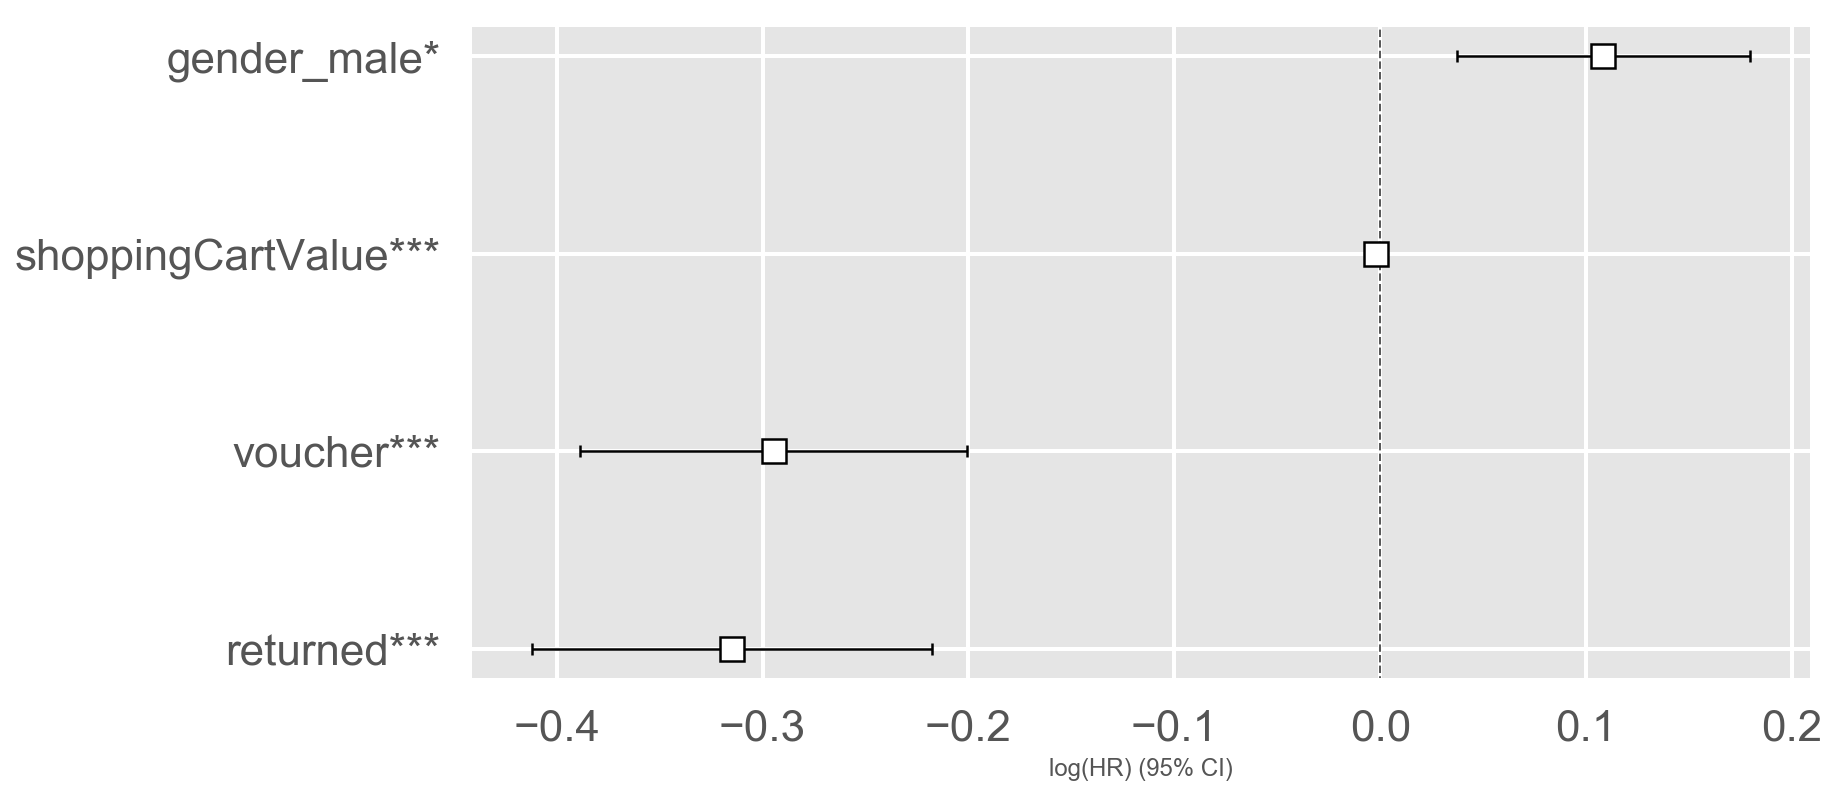

In [353]:
cph.plot()
plt.savefig('Nextorder_coxph.png', dpi=200)

We can see that a shopping cart value increase of 1 dollar decreases the hazard to buy again by a factor of only slightly below 1 - but the coefficient is significant, as are all coefficients. For customers who used a voucher, the hazard is 0.74 times lower, and for customers who returned any of the items, the hazard is 0.73 times lower. Being a man compared to a woman increases the hazard of buying again by the factor 1.11.

## Checking model assumptions 

Validating the model: We will validate the model and test if the model holds true. 

Method 1: We can use the check_assumption_ function to check the validity of the model. 
soufce:https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Checking-assumptions-with-check_assumptions


<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic    p  log(p)   
gender_male       identity            4.48 0.03   -3.37  .
                  km                  5.01 0.03   -3.68  .
                  log                 5.20 0.02   -3.79  .
                  rank                5.83 0.02   -4.15  .
returned          identity            2.41 0.12   -2.12   
                  km                  2.18 0.14   -1.97   
                  log                 1.44 0.23   -1.47   
                  rank                1.68 0.19   -1.64   
shoppingCartValue identity            0.96 0.33   -1.12   
                  km                  0.78 0.38   -0.98   
                  log                 0.00 0.95   -0.05   
                  rank                0.17 0.68   -0.39   
voucher           identity            1.64 0.20   -1.61   
                  km                

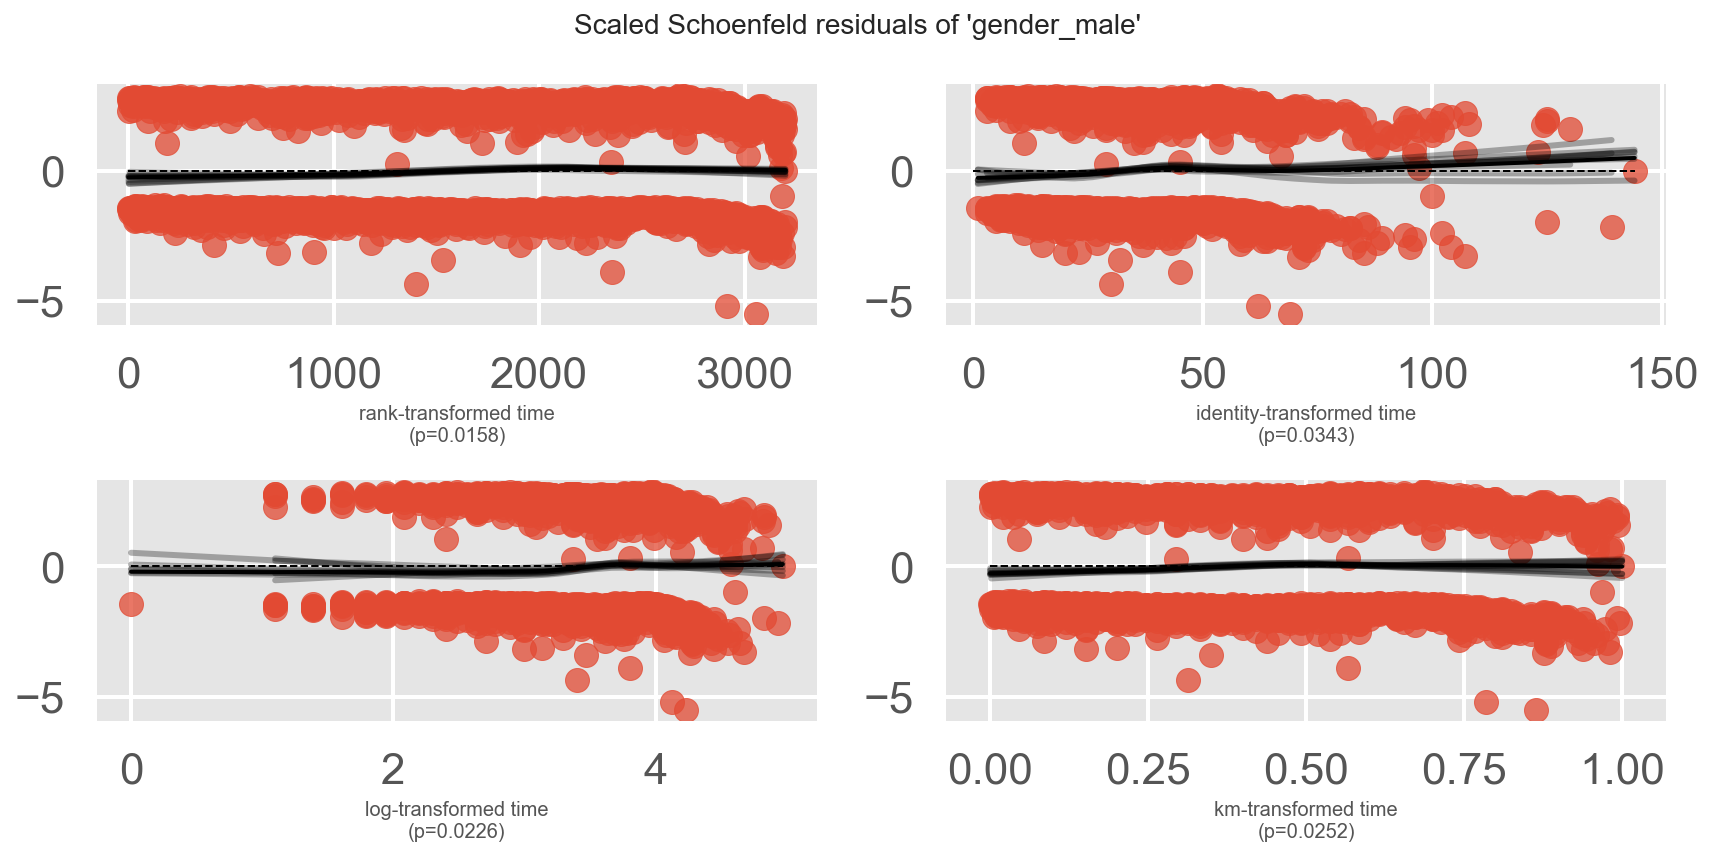

In [354]:
%config InlineBackend.figure_format = 'retina'

cph.check_assumptions(df_dummy)
plt.savefig('Nextorder_cox_assumptions.png', dpi=200)

We see that Variable 'gender_male' failed the non-proportional test, p=0.0158.

Method 2 : Alternatively, you can use the proportional hazard test outside of check_assumptions:

In [306]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(cph, df_dummy, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = untransformed variables

---
                   test_statistic     p  log(p)   
gender_male                 5.830 0.016  -4.151  .
returned                    1.681 0.195  -1.636   
shoppingCartValue           0.173 0.678  -0.389   
voucher                     0.310 0.578  -0.549   
---
Signif. codes: 0 '***' 0.0001 '**' 0.001 '*' 0.01 '.' 0.05 ' ' 1


Note: Stratified analysis can be performed in 2 different ways a) either by splitting time into subsets or....... 

In [307]:
df_dummy.columns

Index(['daysSinceFirstPurch', 'shoppingCartValue', 'voucher', 'returned',
       'boughtAgain', 'gender_male'],
      dtype='object')

In [308]:
df_dummy.head()

daysSinceFirstPurch  shoppingCartValue  voucher  returned  boughtAgain  \
0                   37              33.44        0         0            0   
1                   63              31.71        1         0            1   
2                   48              27.31        0         0            0   
3                   17              41.07        0         0            1   
4                   53              65.56        0         0            0   

   gender_male  
0            1  
1            1  
2            0  
3            1  
4            0

In [309]:
df_dummy.columns

Index(['daysSinceFirstPurch', 'shoppingCartValue', 'voucher', 'returned',
       'boughtAgain', 'gender_male'],
      dtype='object')

In [288]:
df_dummy.head()

daysSinceFirstPurch  shoppingCartValue  voucher  returned  boughtAgain  \
0                   37              33.44        0         0            0   
1                   63              31.71        1         0            1   
2                   48              27.31        0         0            0   
3                   17              41.07        0         0            1   
4                   53              65.56        0         0            0   

   gender_male  T1  E1  
0            1  37   0  
1            1  63   1  
2            0  48   0  
3            1  17   1  
4            0  53   0

## Validate the model to test for overfitting

In [396]:
from lifelines.utils import k_fold_cross_validation

scores = k_fold_cross_validation(cph, df_dummy, 'daysSinceFirstPurch', event_col='boughtAgain', k=10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.5424488290614051, 0.5831909762347385, 0.5108303701106827, 0.5690923494794025, 0.5598106196811699, 0.5458308620007908, 0.5805502059920529, 0.5828921264346831, 0.5408527751411301, 0.5548311350919265]
0.5570330249227982
0.021905828062992308


As we can see from the scores the explanatory power of our model is rather low. We could try to collect more explanatory variables and improve the model. This is outside the scope of this analysis. 

## Making predictions on new customer data
We can now predict the survival curve for a new customer using the Cox Proportional Hazard model that we estimated before. 

In [340]:
# Create data with new customer dat\\
d = {'daysSinceFirstPurch': [21],'shoppingCartValue': [99.90], 'gender_male': [0], 'voucher': [1],'returned': [0]}
newCustomer = pd.DataFrame(data=d).reindex()

In [341]:
newCustomer

daysSinceFirstPurch  shoppingCartValue  gender_male  voucher  returned
0                   21               99.9            0        1         0

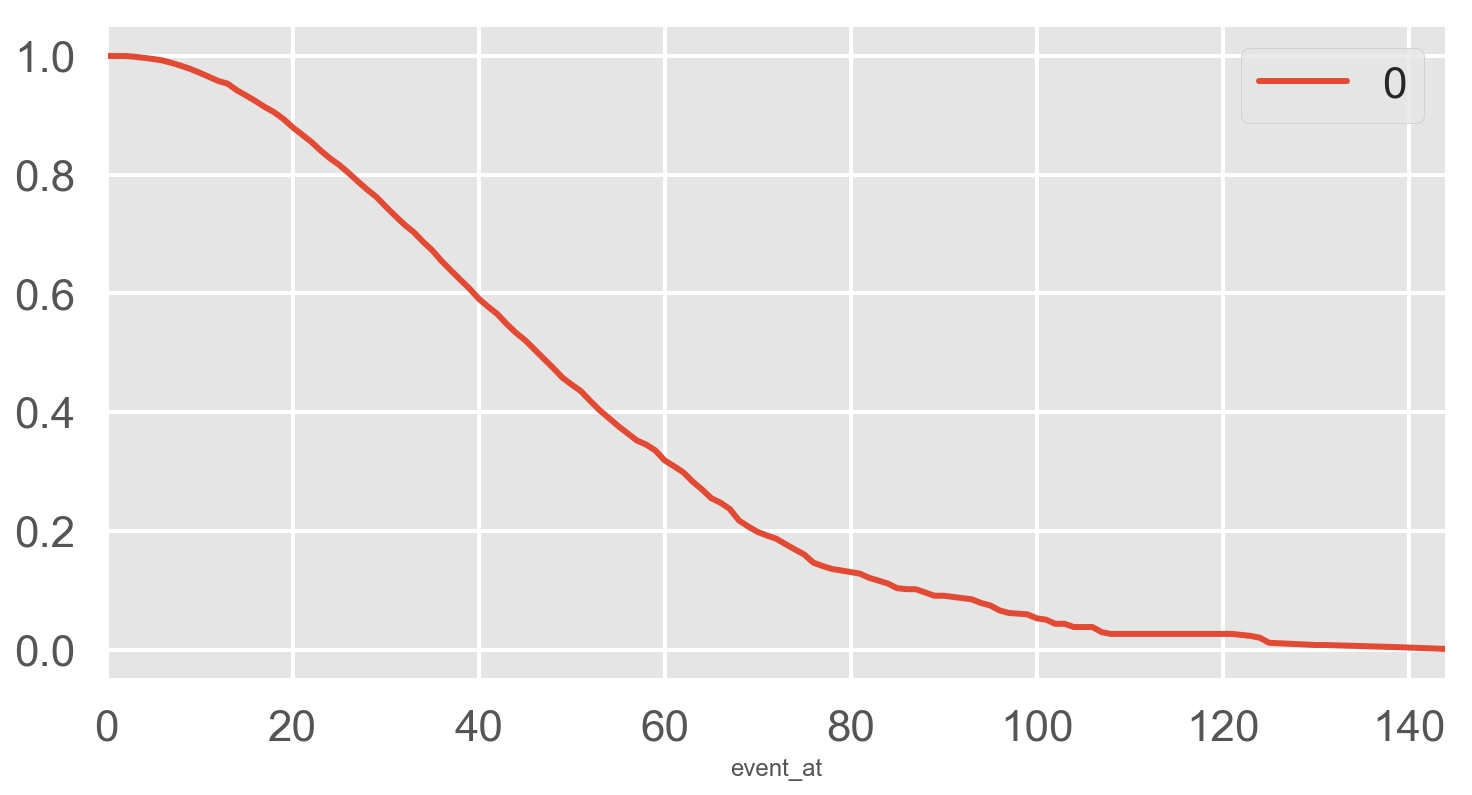

In [343]:
## Lets predict the survival curve for the selected customer. 

cph.predict_survival_function(newCustomer).plot()

We were informed that due to database problems the gender was incorrectly coded: The new customer is actually male. We will change that in our dataframe newCustomer, change the respective variable from femail to male

In [344]:
newCustomer.loc[0, 'gender_male'] = 1

In [347]:
newCustomer

daysSinceFirstPurch  shoppingCartValue  gender_male  voucher  returned
0                   21               99.9            1        1         0

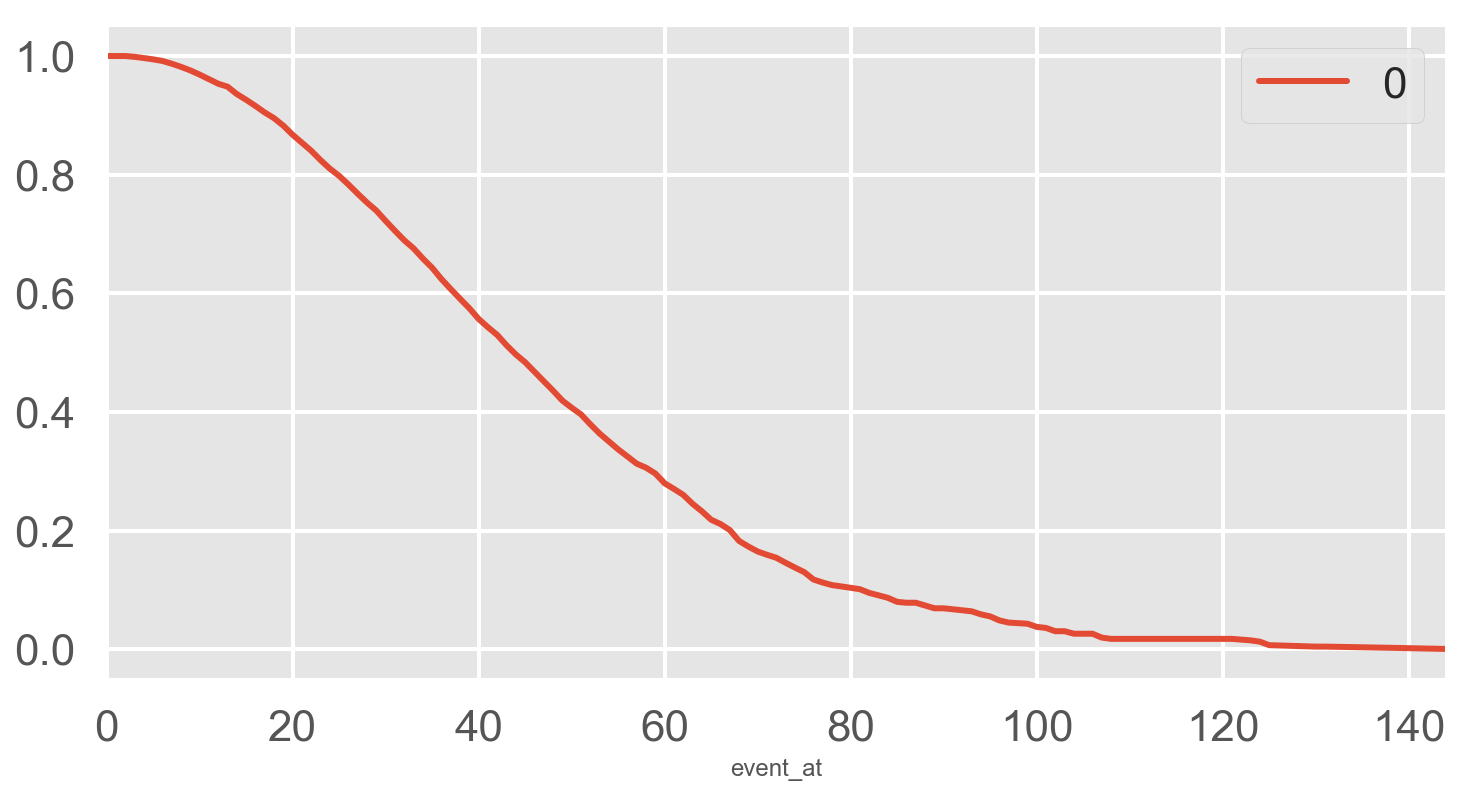

In [346]:
## Lets predict the survival curve for the selected customer. 
cph.predict_survival_function(newCustomer).plot()

In [399]:
cph.predict_median(df_dummy_newCustomer)

inf

In [398]:
df_dummy_newCustomer['pred'] = cph.predict_survival_function(df_dummy_newCustomer)
df_dummy_newCustomer['pred'].describe()

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: pred, dtype: float64

The correction of the gender decreased the predicted median time until the second order from 47 to 44 days.

**Conclusions from Survival Analysis of Customer Sales Data**


- We performed survival analysis using Kaplan-Meier fitting 
- The analysis was performed without and with a categorical covariate, "voucher"
- We also included more variables and performed CoxPH fitting to analyze the data
- We tested the model assumptions and showed thathe model was valid to predict from new data. 


Analysis of the data showed the following: 
- Customers using a voucher seem to take longer to place their second order. 

- Inclusion of other variables showed that a shopper's repurchasing beharviour is dependent on the shopping cart value, voucher and customers who returned an item. Sex was a significant factor affect the repurchashing behavior.   

- Based on our model the predicted median time until the second order from a female shopper with a voucher is 44 days. 

# (IV) CRM data analysis through PCA

**What IS CRM?** 

Customer relationship management (CRM) is the combination of practices, strategies and technologies that companies use to manage and analyze customer interactions and data throughout the customer lifecycle, with the goal of improving customer service relationships and assisting in customer retention and driving sales growth. CRM systems compile customer data across different channels, or points of contact between the customer and the company, which could include the company's website, telephone, live chat, direct mail, marketing materials and social media. CRM systems can also give customer-facing staff detailed information on customers' personal information, purchase history, buying preferences and concerns. (adapted from https://searchcrm.techtarget.com/definition/CRM)

**CRM Analytics**

CRM (customer relationship management) analytics comprises all programming that analyzes data about customers and presents it to help facilitate and streamline better business decisions.


**Applications of CRM analytics**

After implementation, CRM analytics offers insights to understand and use the data that is mined. Organizations use CRM analytics in the following ways:

**Customer segmentation groupings**: Dividing customers into those most and least likely to repurchase a product;

**Profitability analysis and customer value**: Learning which customers contribute to the highest profits over time. This involves understanding not just how much a customer spends, but how many resources you dedicate to that customer in return;

**Personalization**: The ability to market to individual customers based on the data collected about them. This requires obtaining a 360-degree customer view;

**Measuring and tracking escalation**: The ability to measure how often problems arise with a product or service to eliminate that issue and quickly achieve customer satisfaction; and
Predictive modeling: Comparing various product development plans in terms of likely future success given the customer knowledge base by measuring engagement levels through customer shares.

CRM data can get very extensive. Each metric you collect could carry some interesting information about your customers. But handling a dataset with too many variables is difficult. Learn how to reduce the number of variables in your data using principal component analysis. Not only does this help to get a better understanding of your data. PCA also enables you to condense information to single indices and to solve multicollinearity problems in a regression analysis with many intercorrelated variables.(adapated from Datacamp course: Marketing Analytics in R: Statistical Modeling)

We will use "**newsData**" for PCA analysis 

In [356]:
# reading the newsData.RData file
import pyreadr
newsData = pyreadr.read_r('newsData.RData')

In [357]:
type(newsData)

collections.OrderedDict

In [358]:
newsData= pd.read_csv('newsData.csv')

In [359]:
newsData.head()

Unnamed: 0                                                url  timedelta  \
0           1  http://mashable.com/2013/01/07/amazon-instant-...        731   
1           2  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2           3  http://mashable.com/2013/01/07/apple-40-billio...        731   
3           4  http://mashable.com/2013/01/07/astronaut-notre...        731   
4           5   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385          4               2  ...   
1                  0.791946          3               1  ...   
2                  0.663866          3               1  ...   
3                  0.665635          9               0  ...   
4                  0.540890         19              19  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [360]:
newsData.shape

(39644, 62)

In [8]:
newsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 62 columns):
Unnamed: 0                       39644 non-null int64
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bu

In [362]:
newsData.describe(include = 'all')

Unnamed: 0                                                url  \
count   39644.000000                                              39644   
unique           NaN                                              39644   
top              NaN  http://mashable.com/2014/02/01/facebook-pages-...   
freq             NaN                                                  1   
mean    19822.500000                                                NaN   
std     11444.381373                                                NaN   
min         1.000000                                                NaN   
25%      9911.750000                                                NaN   
50%     19822.500000                                                NaN   
75%     29733.250000                                                NaN   
max     39644.000000                                                NaN   

           timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count   39644.000000    39644.000000      39644.000000     39644.000000   
unique           NaN             NaN               NaN              NaN   
top              NaN             NaN               NaN              NaN   
freq             NaN             NaN               NaN              NaN   
mean      354.530471       10.398749        546.514731         0.548216   
std       214.163767        2.114037        471.107508         3.520708   
min         8.000000        2.000000          0.000000         0.000000   
25%       164.000000        9.000000        246.000000         0.470870   
50%       339.000000       10.000000        409.000000         0.539226   
75%       542.000000       12.000000        716.000000         0.608696   
max       731.000000       23.000000       8474.000000       701.000000   

        n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000              39644.000000  39644.000000   
unique               NaN                       NaN           NaN   
top                  NaN                       NaN           NaN   
freq                 NaN                       NaN           NaN   
mean            0.996469                  0.689175     10.883690   
std             5.231231                  3.264816     11.332017   
min             0.000000                  0.000000      0.000000   
25%             1.000000                  0.625739      4.000000   
50%             1.000000                  0.690476      8.000000   
75%             1.000000                  0.754630     14.000000   
max          1042.000000                650.000000    304.000000   

        num_self_hrefs  ...  min_positive_polarity  max_positive_polarity  \
count     39644.000000  ...           39644.000000           39644.000000   
unique             NaN  ...                    NaN                    NaN   
top                NaN  ...                    NaN                    NaN   
freq               NaN  ...                    NaN                    NaN   
mean          3.293638  ...               0.095446               0.756728   
std           3.855141  ...               0.071315               0.247786   
min           0.000000  ...               0.000000               0.000000   
25%           1.000000  ...               0.050000               0.600000   
50%           3.000000  ...               0.100000               0.800000   
75%           4.000000  ...               0.100000               1.000000   
max         116.000000  ...               1.000000               1.000000   

        avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count            39644.000000           39644.000000           39644.000000   
unique                    NaN                    NaN                    NaN   
top                       NaN                    NaN                    NaN   
freq                      NaN                    NaN                    NaN   
mean                -0.259524              -0.521944              -0.10

We will look at the correlation between the variables by using different visualization plots. 

**Why is it interesting to look at the correlation structure of the data before doing PCA?** 
PCA uses the correlations to determine the components that cover as much as possible of the original variance. We may already be able to see groups in the correlation matrix which form a component later on. Hence we look at the correlation matrix to explore variable which correlate. 



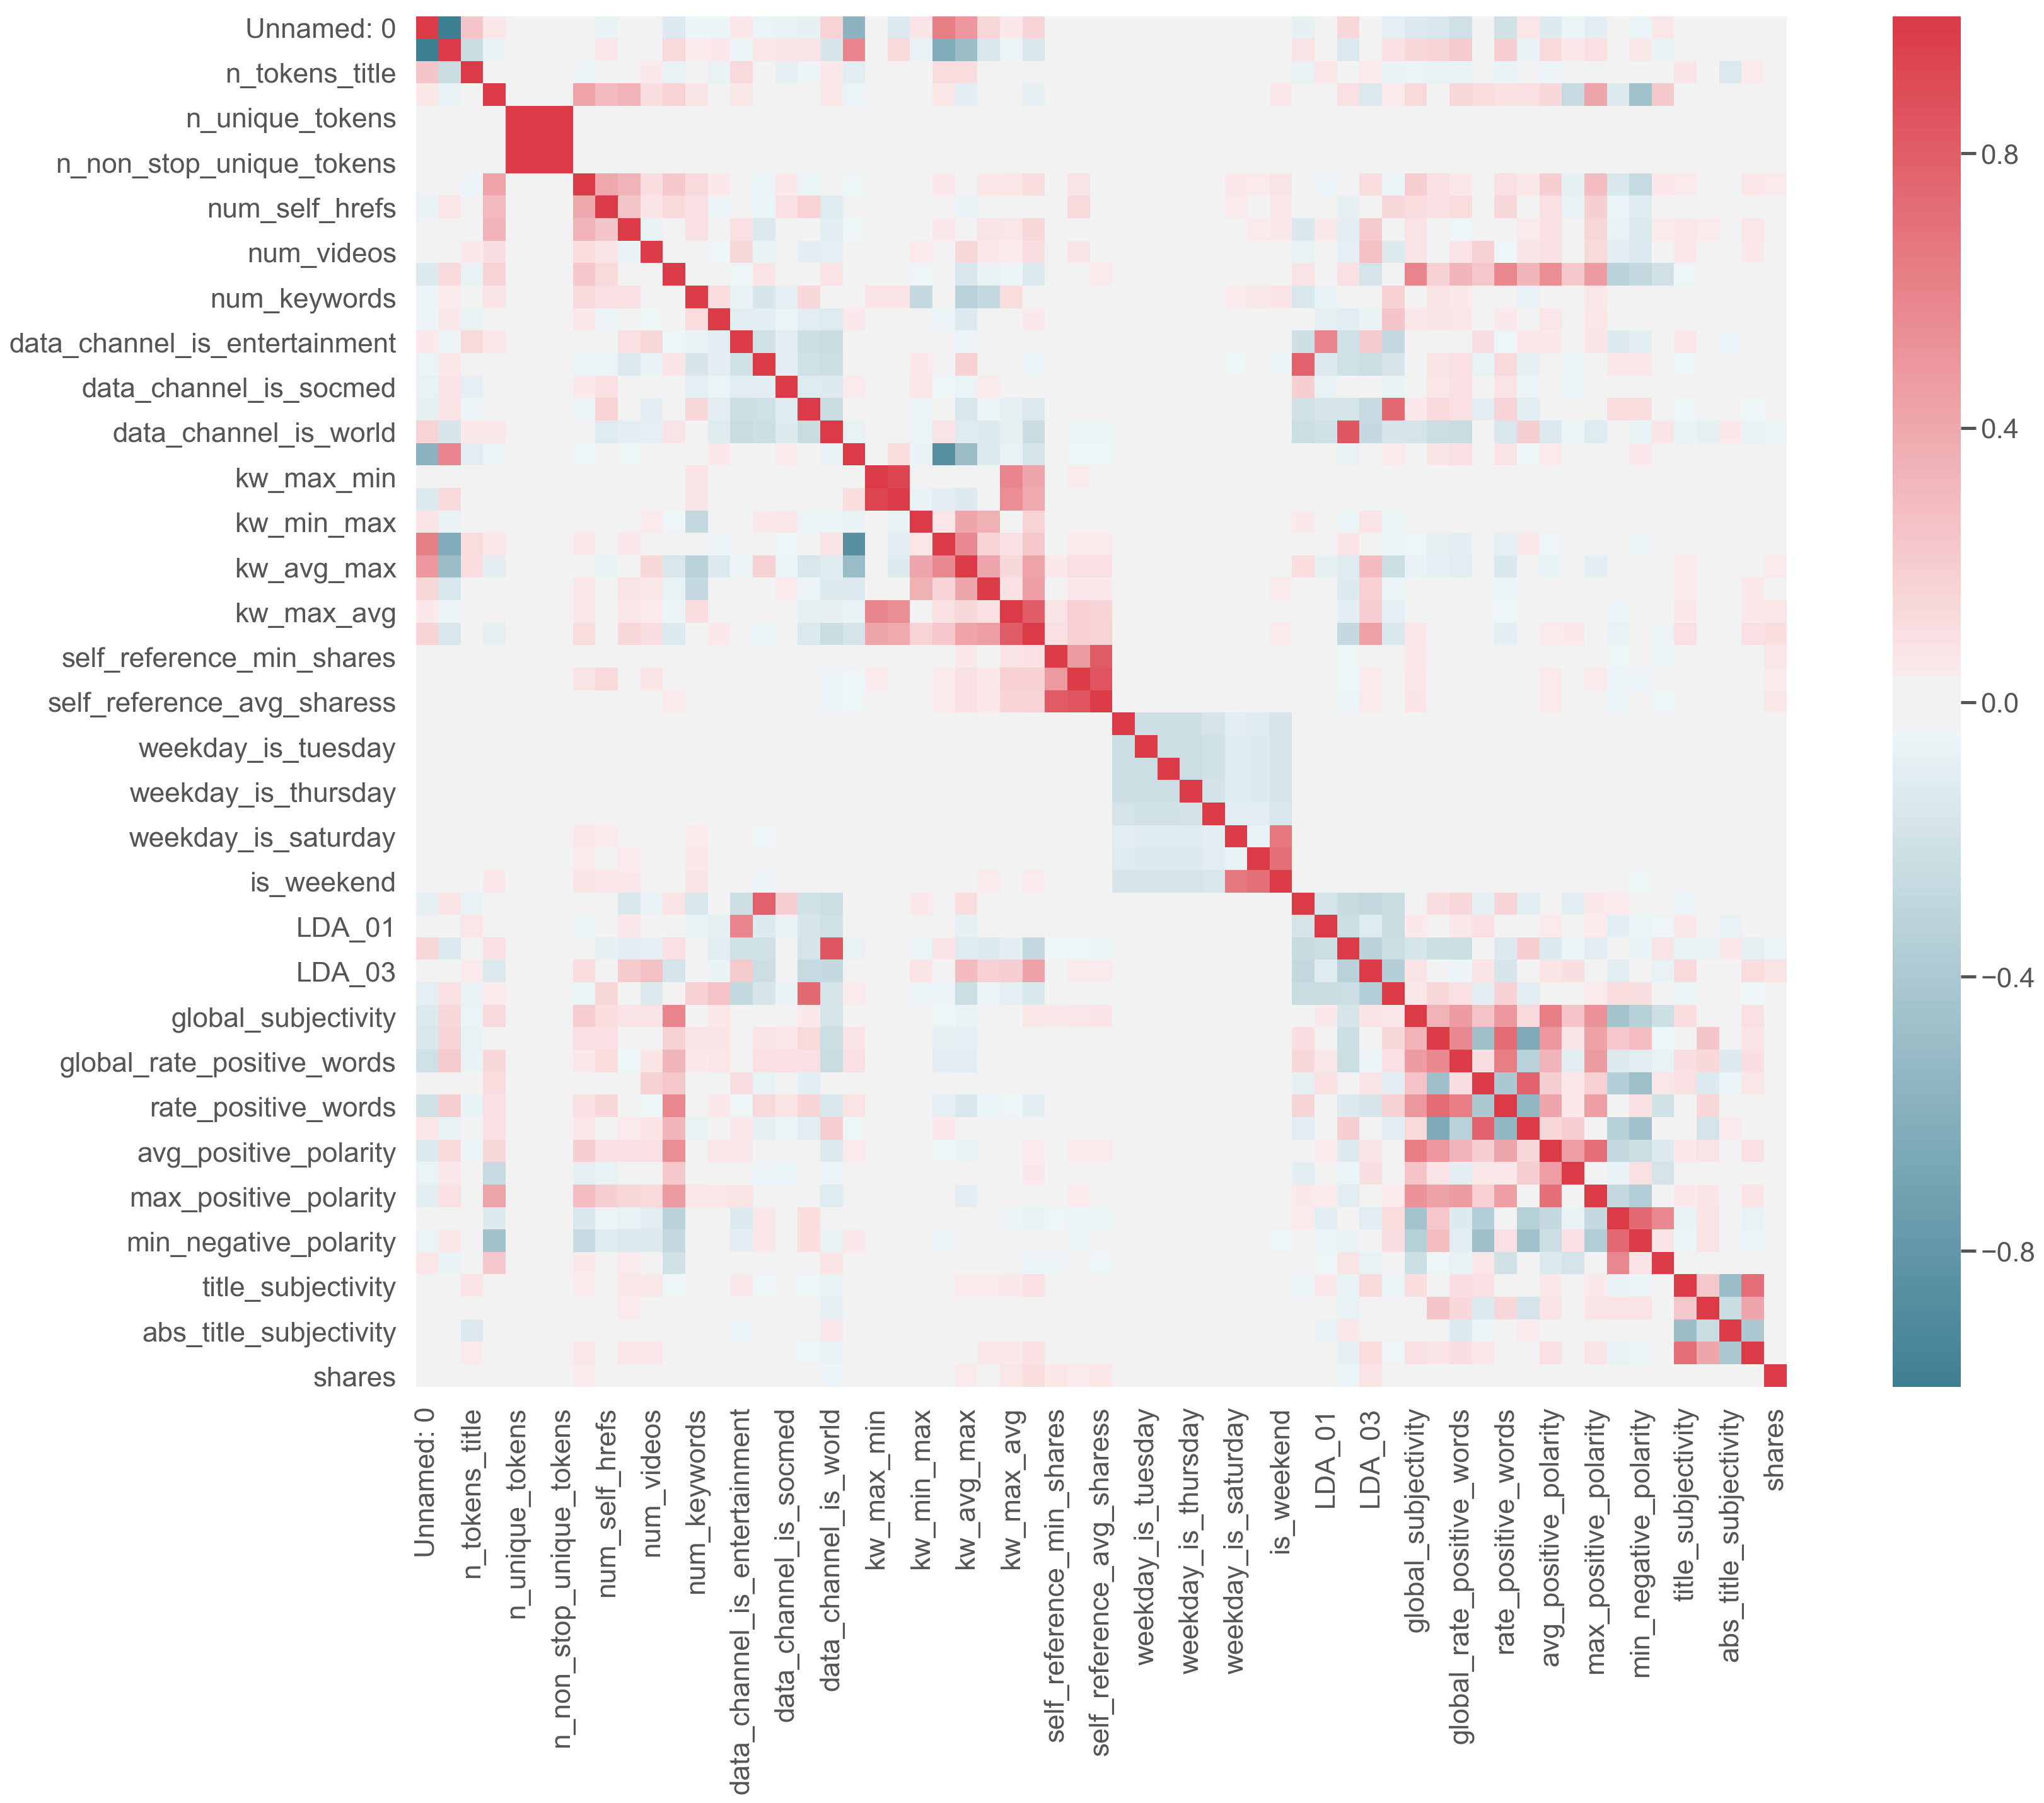

In [363]:
f, ax = plt.subplots(figsize=(30, 20))  # l, b
corr = newsData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('heatmap_CRM.png', dpi=200)

We notice the group of intercorrelated variables in the bottom right area of the plot. Let's see if this group reflects in the principal components.

In [11]:
# pd.plotting.scatter_matrix(newsData, alpha = 0.3, figsize = (14,8), diagonal = 'kde')    

In [12]:
# sns.pairplot(newsData)

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
           

## Compute the PCA

In [520]:
newsData.head()

Unnamed: 0                                                url  timedelta  \
0           1  http://mashable.com/2013/01/07/amazon-instant-...        731   
1           2  http://mashable.com/2013/01/07/ap-samsung-spon...        731   
2           3  http://mashable.com/2013/01/07/apple-40-billio...        731   
3           4  http://mashable.com/2013/01/07/astronaut-notre...        731   
4           5   http://mashable.com/2013/01/07/att-u-verse-apps/        731   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385          4               2  ...   
1                  0.791946          3               1  ...   
2                  0.663866          3               1  ...   
3                  0.665635          9               0  ...   
4                  0.540890         19              19  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

To simplify the analysis from 61 variables we will use 21 variables and perform PCA analysis on that. 

In [524]:
# droping variables from newsData
newsData_a= newsData.drop(['Unnamed: 0', 'url', 'timedelta', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'rate_positive_words', 'rate_negative_words', 'min_positive_polarity',
       'max_positive_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'], axis =1 )

In [525]:
newsData_a.shape

(39644, 21)

In [523]:
newsData_a.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_avg_min', 'kw_avg_max', 'kw_avg_avg', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'logshares'],
      dtype='object')

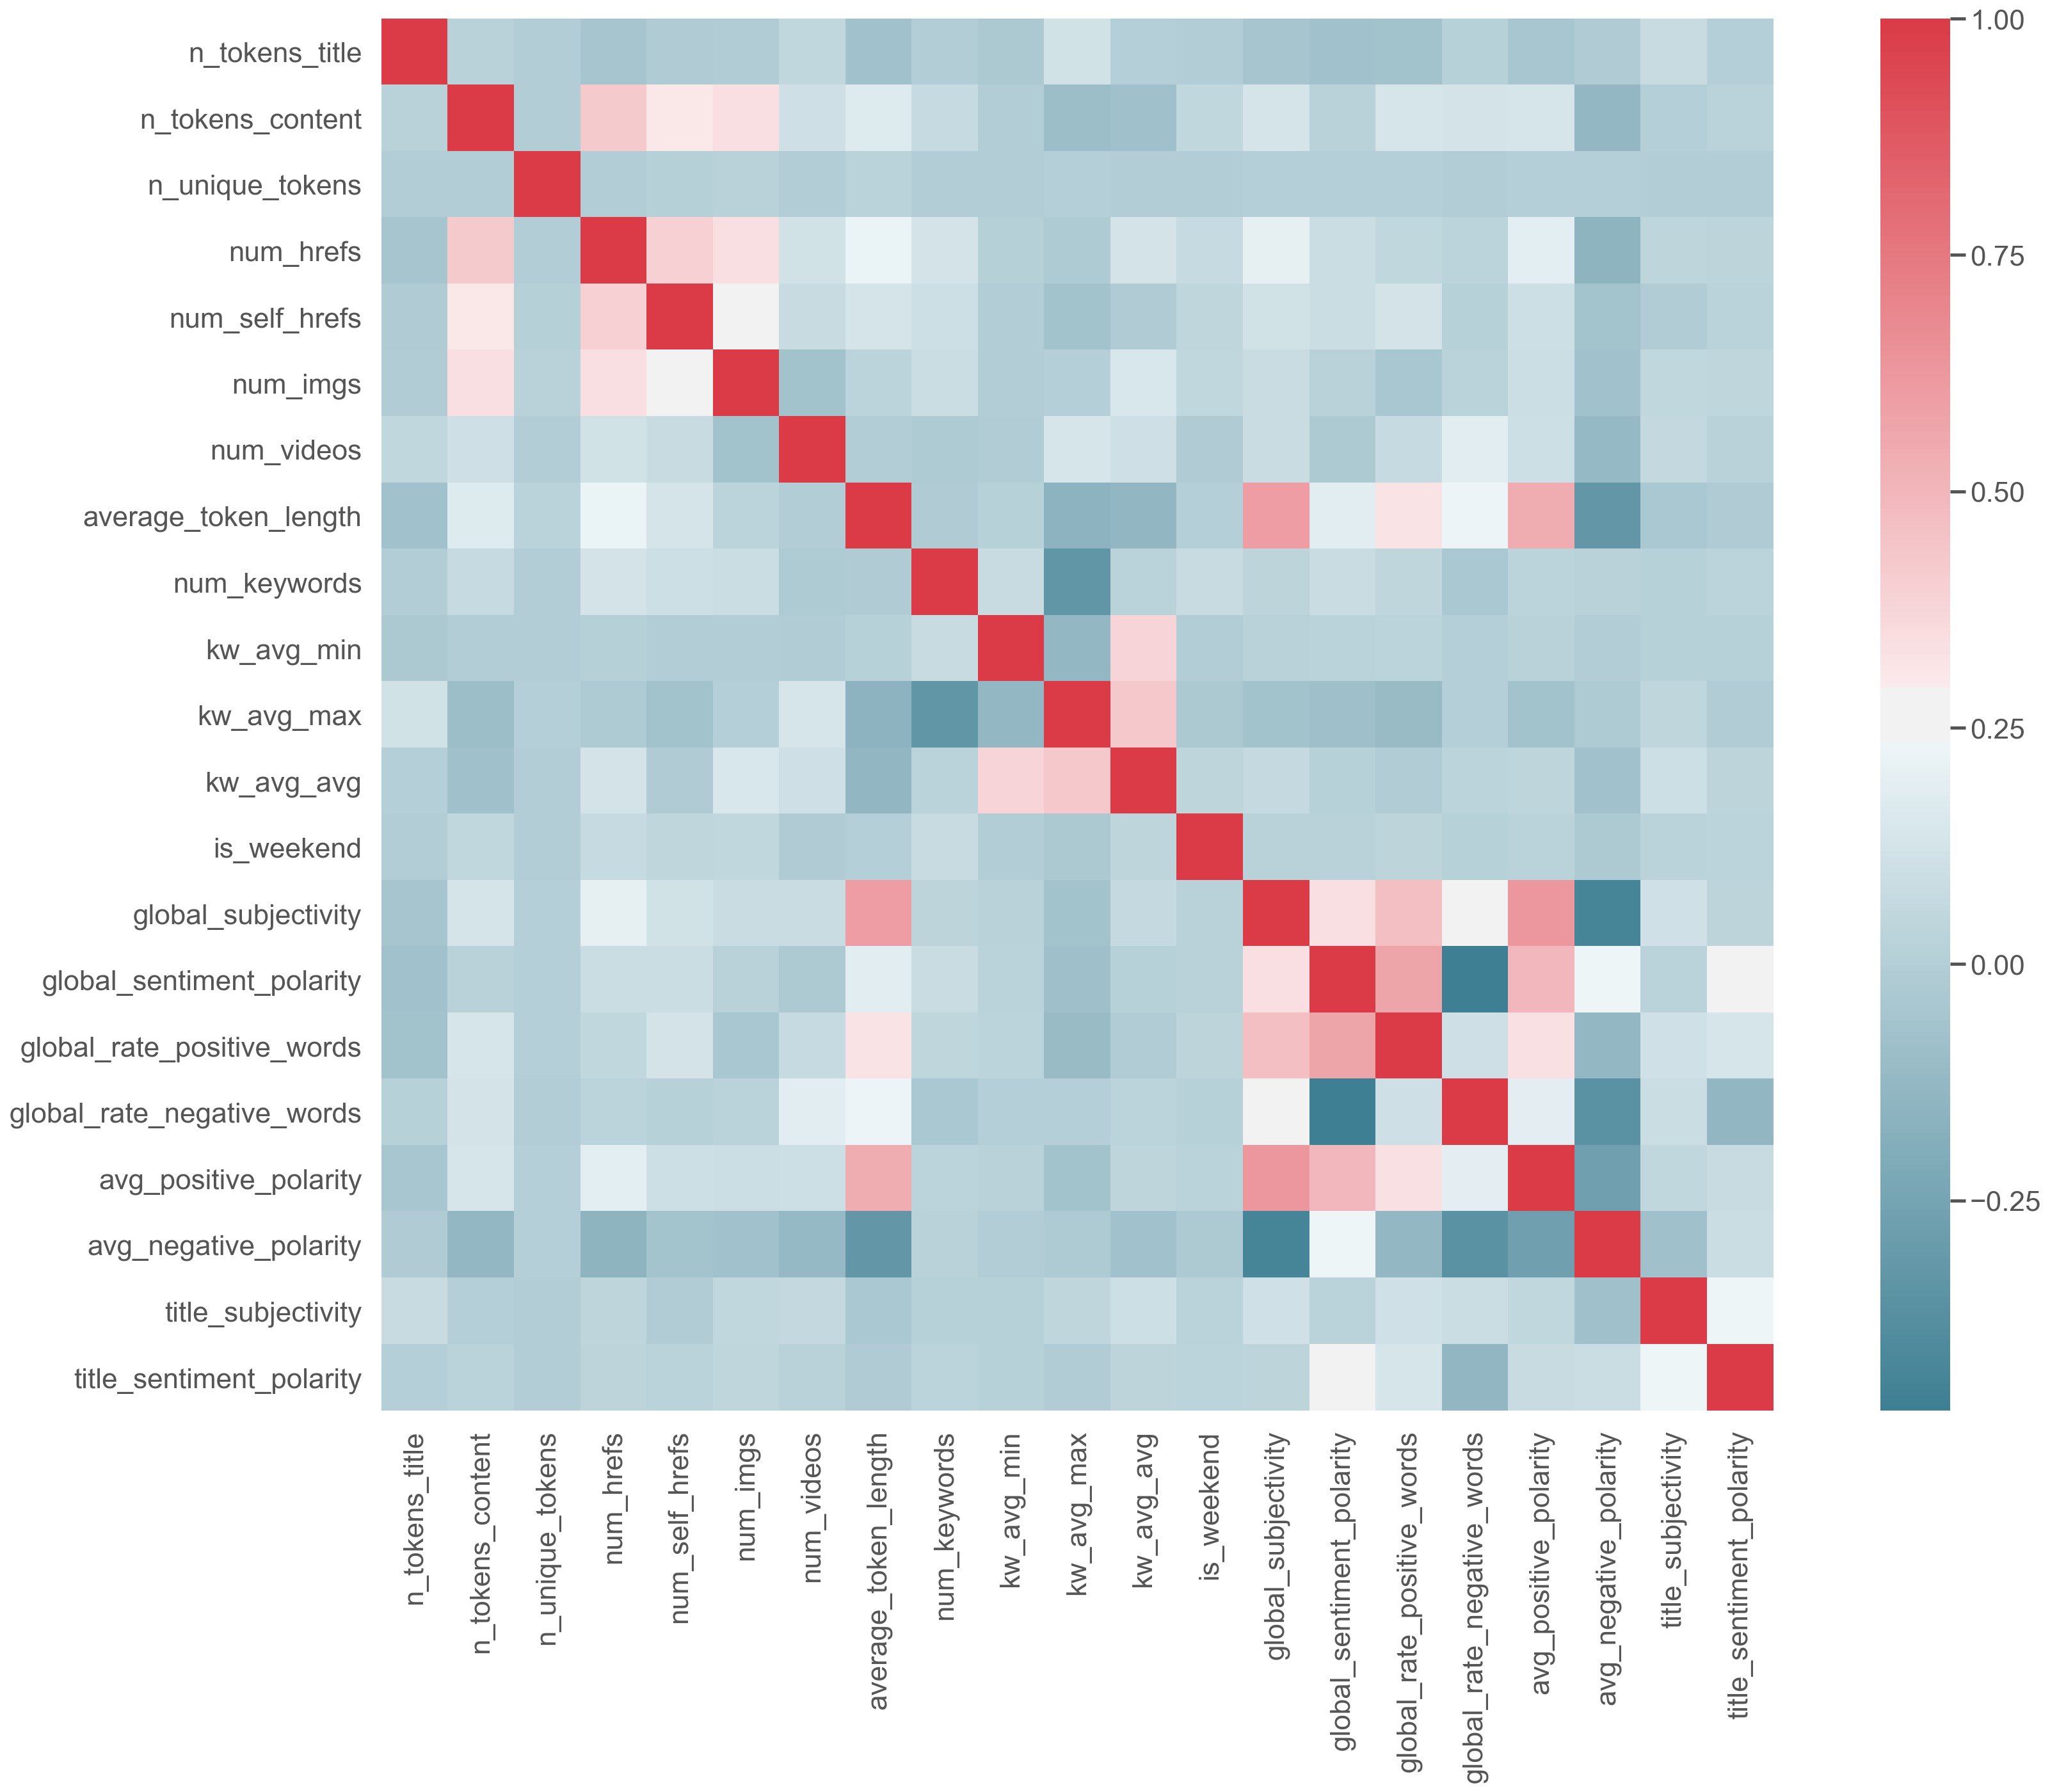

In [532]:
f, ax = plt.subplots(figsize=(30, 20)) 
corr = newsData_a.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('heatmap_CRM1.png', dpi=200)

We notice the group of intercorrelated variables in the bottom right area of the plot? Let's see if this group reflects in the principal components.

## Standardization of all the variables

If some variables have a large variance and some small, PCA (maximizing variance) will load on the large variances. For example if you change one variable from km to cm (increasing its variance), it may go from having little impact to dominating the first principle component. If you want your PCA to be independent of such rescaling, standardizing the variables will do that. On the other hand, if the specific scale of your variables matters (in that you want your PCA to be in that scale), maybe you don't want to standardize  (adapated from https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca )

In [436]:
## Standardize the data by scaling all the variables. 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [437]:
from sklearn.decomposition import PCA
# Create a PCA instance: model
model = PCA()

In [438]:
# Create scaler: scaler
scaler = StandardScaler()

In [439]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, model)

In [440]:
# Fit the pipeline to 'newsData1'
pca_features= pipeline.fit(newsData_a)

## Variance of the PCA features

In [441]:
print(model.explained_variance_)

[3.31023457 2.00246542 1.82667426 1.67425462 1.30253139 1.20446066
 1.02892077 1.00054961 0.97931737 0.9590748  0.82678577 0.74953782
 0.73163854 0.66353537 0.62321228 0.57950535 0.4702178  0.41517983
 0.29927247 0.27691061 0.07625039]


In [442]:
# looking at variance ratio to see how many components explain 80% of the variance. 
print(model.explained_variance_ratio_)

[0.15762624 0.09535309 0.08698229 0.0797244  0.06202374 0.05735382
 0.04899499 0.04764402 0.04663298 0.04566908 0.03936976 0.03569138
 0.03483905 0.03159613 0.02967603 0.0275948  0.02239076 0.01976997
 0.01425071 0.01318589 0.00363088]


In [443]:
print(model.singular_values_)

[362.25354267 281.75119638 269.10007023 257.62856166 227.236115
 218.51415018 201.96412109 199.16020773 197.03572937 194.98872395
 181.04217317 172.37728346 170.30662545 162.18672168 157.18143787
 151.56955716 136.5314772  128.2925326  108.92225852 104.77388701
  54.97994531]


In [511]:
model.components_

array([[-5.36415682e-02,  2.26545709e-01,  4.57507257e-03,
         2.58529289e-01,  1.95099655e-01,  1.42357351e-01,
         8.51176344e-02,  3.88725067e-01,  7.48419260e-02,
         2.98924808e-02, -9.72366425e-02,  1.76102564e-02,
         4.61720189e-02,  4.47536016e-01,  2.49815922e-01,
         3.33803599e-01,  1.47441295e-01,  4.19339577e-01,
        -2.49633592e-01,  7.22987482e-02,  6.79545780e-02],
       [ 1.01763856e-01,  1.71219943e-01,  1.24467026e-03,
         1.61285193e-01,  7.35326000e-02,  1.50665839e-01,
         1.95472169e-01,  2.33768552e-02, -1.11415202e-01,
        -6.12740219e-03,  2.07958653e-01,  1.54159542e-01,
         5.11154215e-03,  6.13369643e-03, -5.52341608e-01,
        -2.53124520e-01,  4.65161705e-01, -8.94830784e-02,
        -3.69368198e-01,  2.71099231e-02, -2.39206964e-01],
       [-9.33365301e-03,  3.80597708e-01,  1.11352938e-03,
         4.21002545e-01,  3.93283329e-01,  4.31437997e-01,
        -4.21352142e-02, -1.94463107e-01,  2.48729296e

In [445]:
df= pd.DataFrame(model.components_, columns= newsData1.columns).T 

In [450]:
df.columns = ['PC'+str(item) for item in range(1, 22)]

In [533]:
df.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
n_tokens_title   -0.053642  0.101764 -0.009334  0.099751 -0.203589 -0.277965   
n_tokens_content  0.226546  0.171220  0.380598 -0.122596 -0.147473 -0.016060   
n_unique_tokens   0.004575  0.001245  0.001114 -0.009627 -0.006706  0.060778   
num_hrefs         0.258529  0.161285  0.421003  0.034792 -0.072534  0.112245   
num_self_hrefs    0.195100  0.073533  0.393283 -0.056706 -0.123272  0.084885   

                       PC7       PC8       PC9      PC10  ...      PC12  \
n_tokens_title   -0.120326  0.019157  0.098938 -0.875882  ... -0.076201   
n_tokens_content -0.102484  0.027200 -0.060980 -0.002198  ... -0.012923   
n_unique_tokens   0.273876  0.908114  0.305460 -0.005079  ...  0.010060   
num_hrefs        -0.038704 -0.010737 -0.019514  0.061515  ... -0.110935   
num_self_hrefs   -0.199337  0.050637  0.038645  0.038798  ...  0.305648   

                      PC13      PC14      PC15      PC16      PC17      PC18  \
n_tokens_title    0.041776 -0.027595  0.041066  0.005806  0.129350  0.053076   
n_tokens_content -0.432853  0.000754 -0.316816  0.264701 -0.490529 -0.071255   
n_unique_tokens  -0.002044  0.003533 -0.030345  0.019083 -0.013773  0.037195   
num_hrefs         0.213478  0.265247 -0.152480  0.399122  0.500672  0.335328   
num_self_hrefs    0.601778 -0.212464  0.302134 -0.234973 -0.240733 -0.030286   

                      PC19      PC20      PC21  
n_tokens_title    0.031836  0.036211 -0.000968  
n_tokens_content  0.147257  0.088205  0.020688  
n_unique_tokens   0.008884 -0.007855 -0.002695  
num_hrefs        -0.084600 -0.127048 -0.026056  
num_self_hrefs    0.029784  0.043439  0.008684  

[5 rows x 21 columns]

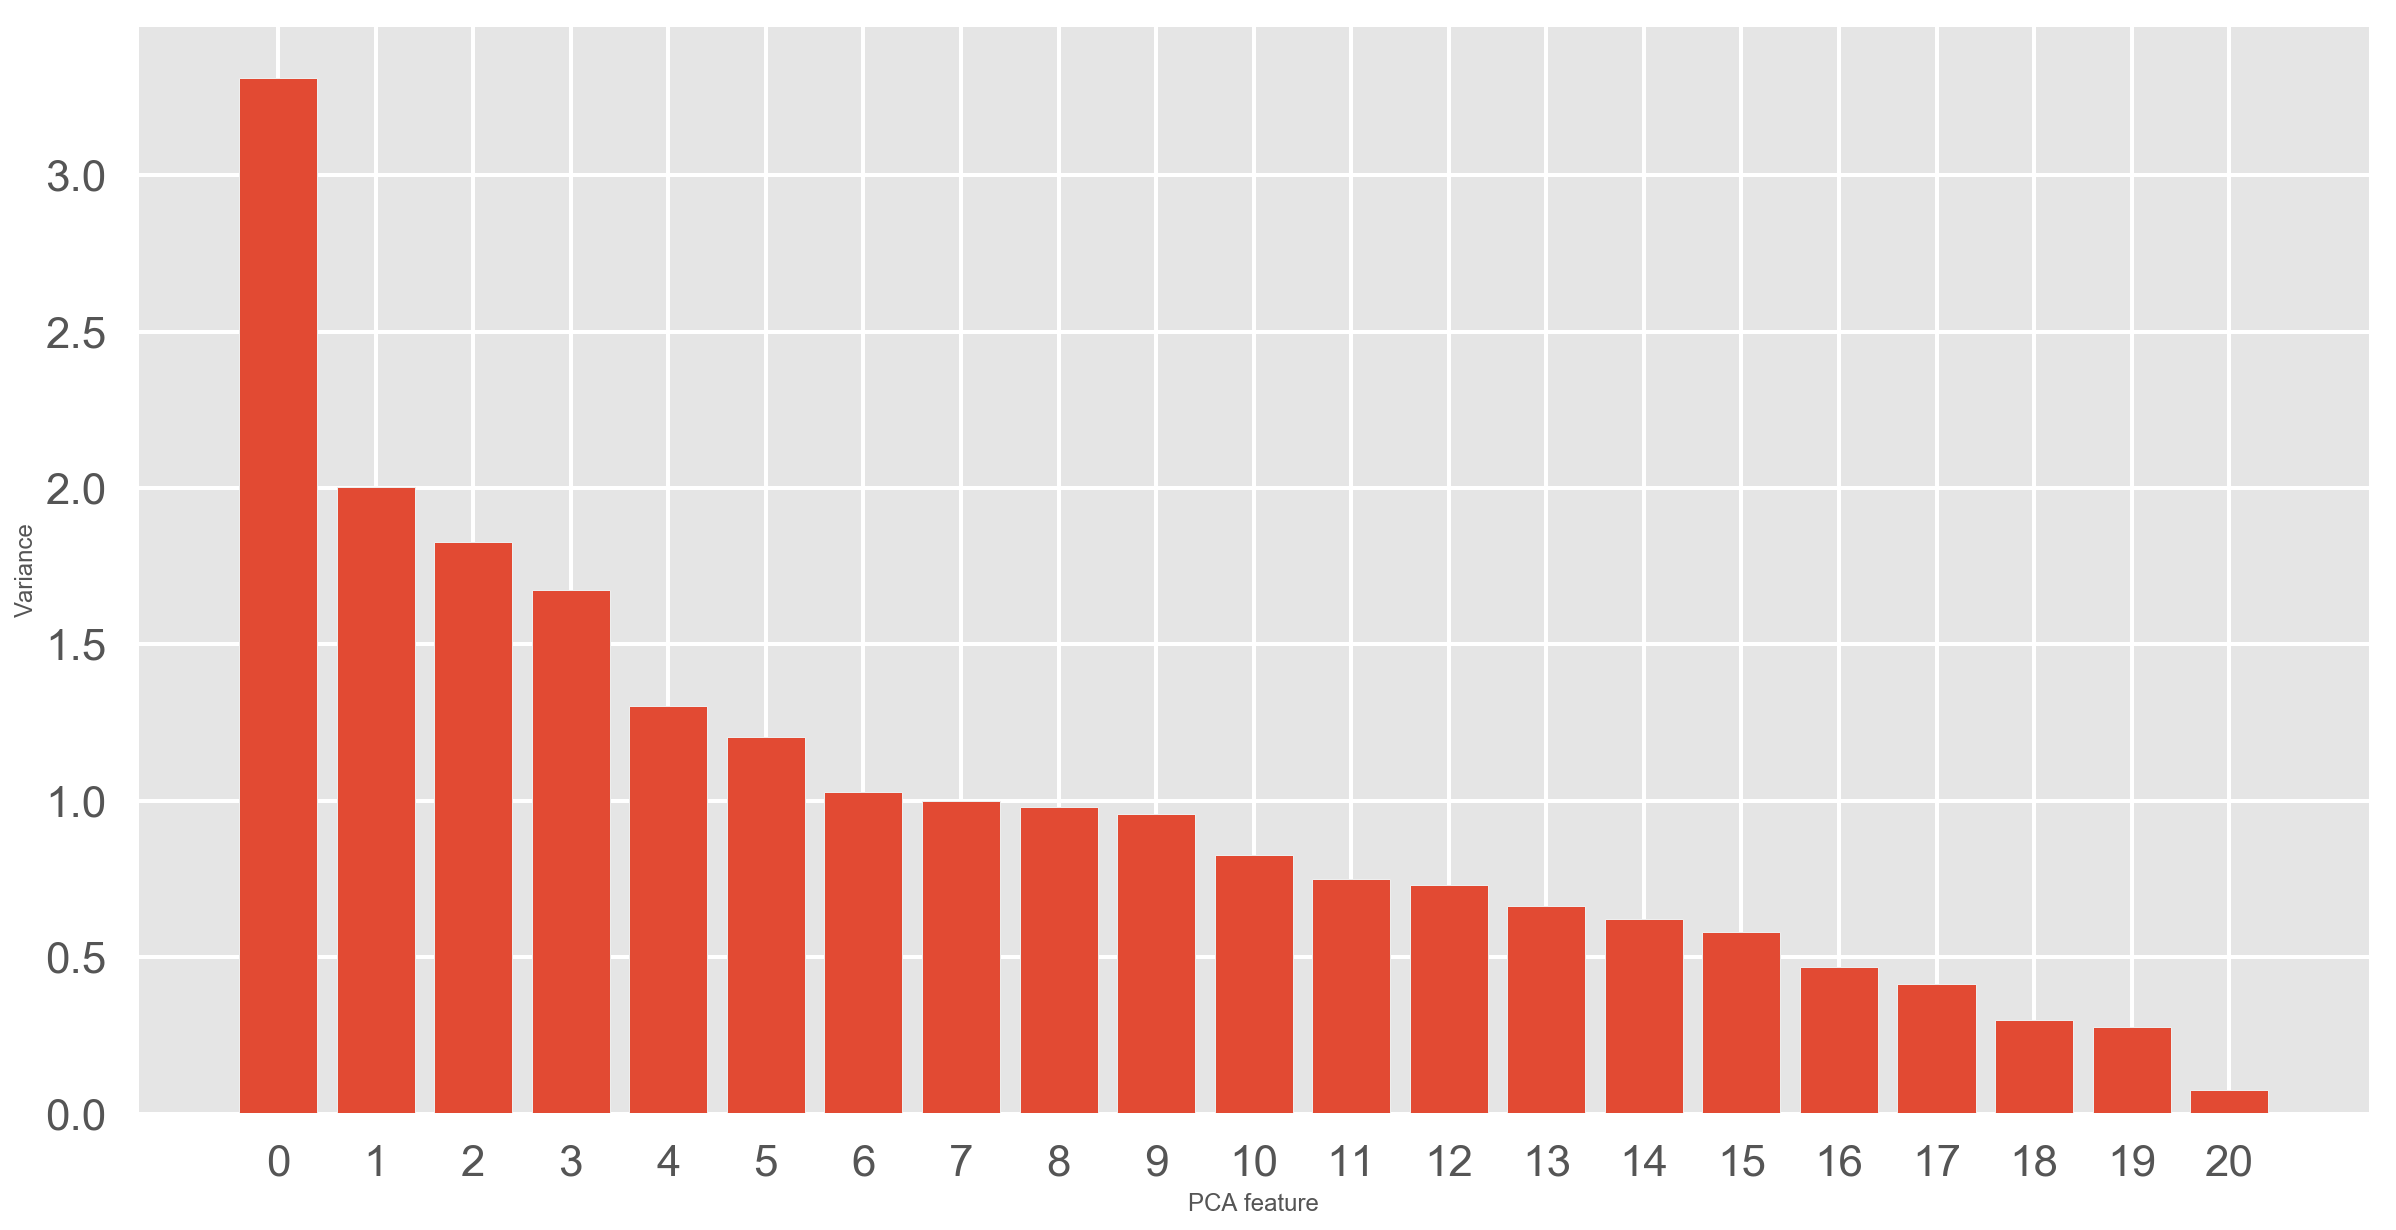

<Figure size 864x432 with 0 Axes>

In [452]:
# Plot the explained variances
f, ax = plt.subplots(figsize=(20, 10))
features = range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')  # cumulative explained variance? 
plt.xticks(features)
plt.show()
plt.savefig('Explained Variance_PCA.png', dpi=200)

## How many components are relevant?

Our goal is a dimension reduction. It's time to find out how many components you should extract. We can use several approaches to make this decision.

## Scree plots 

A scree plot shows the eigenvalues on the y-axis and the number of factors on the x-axis. It always displays a downward curve. The point where the slope of the curve is clearly leveling off (the “elbow) indicates the number of factors that should be generated by the analysis.

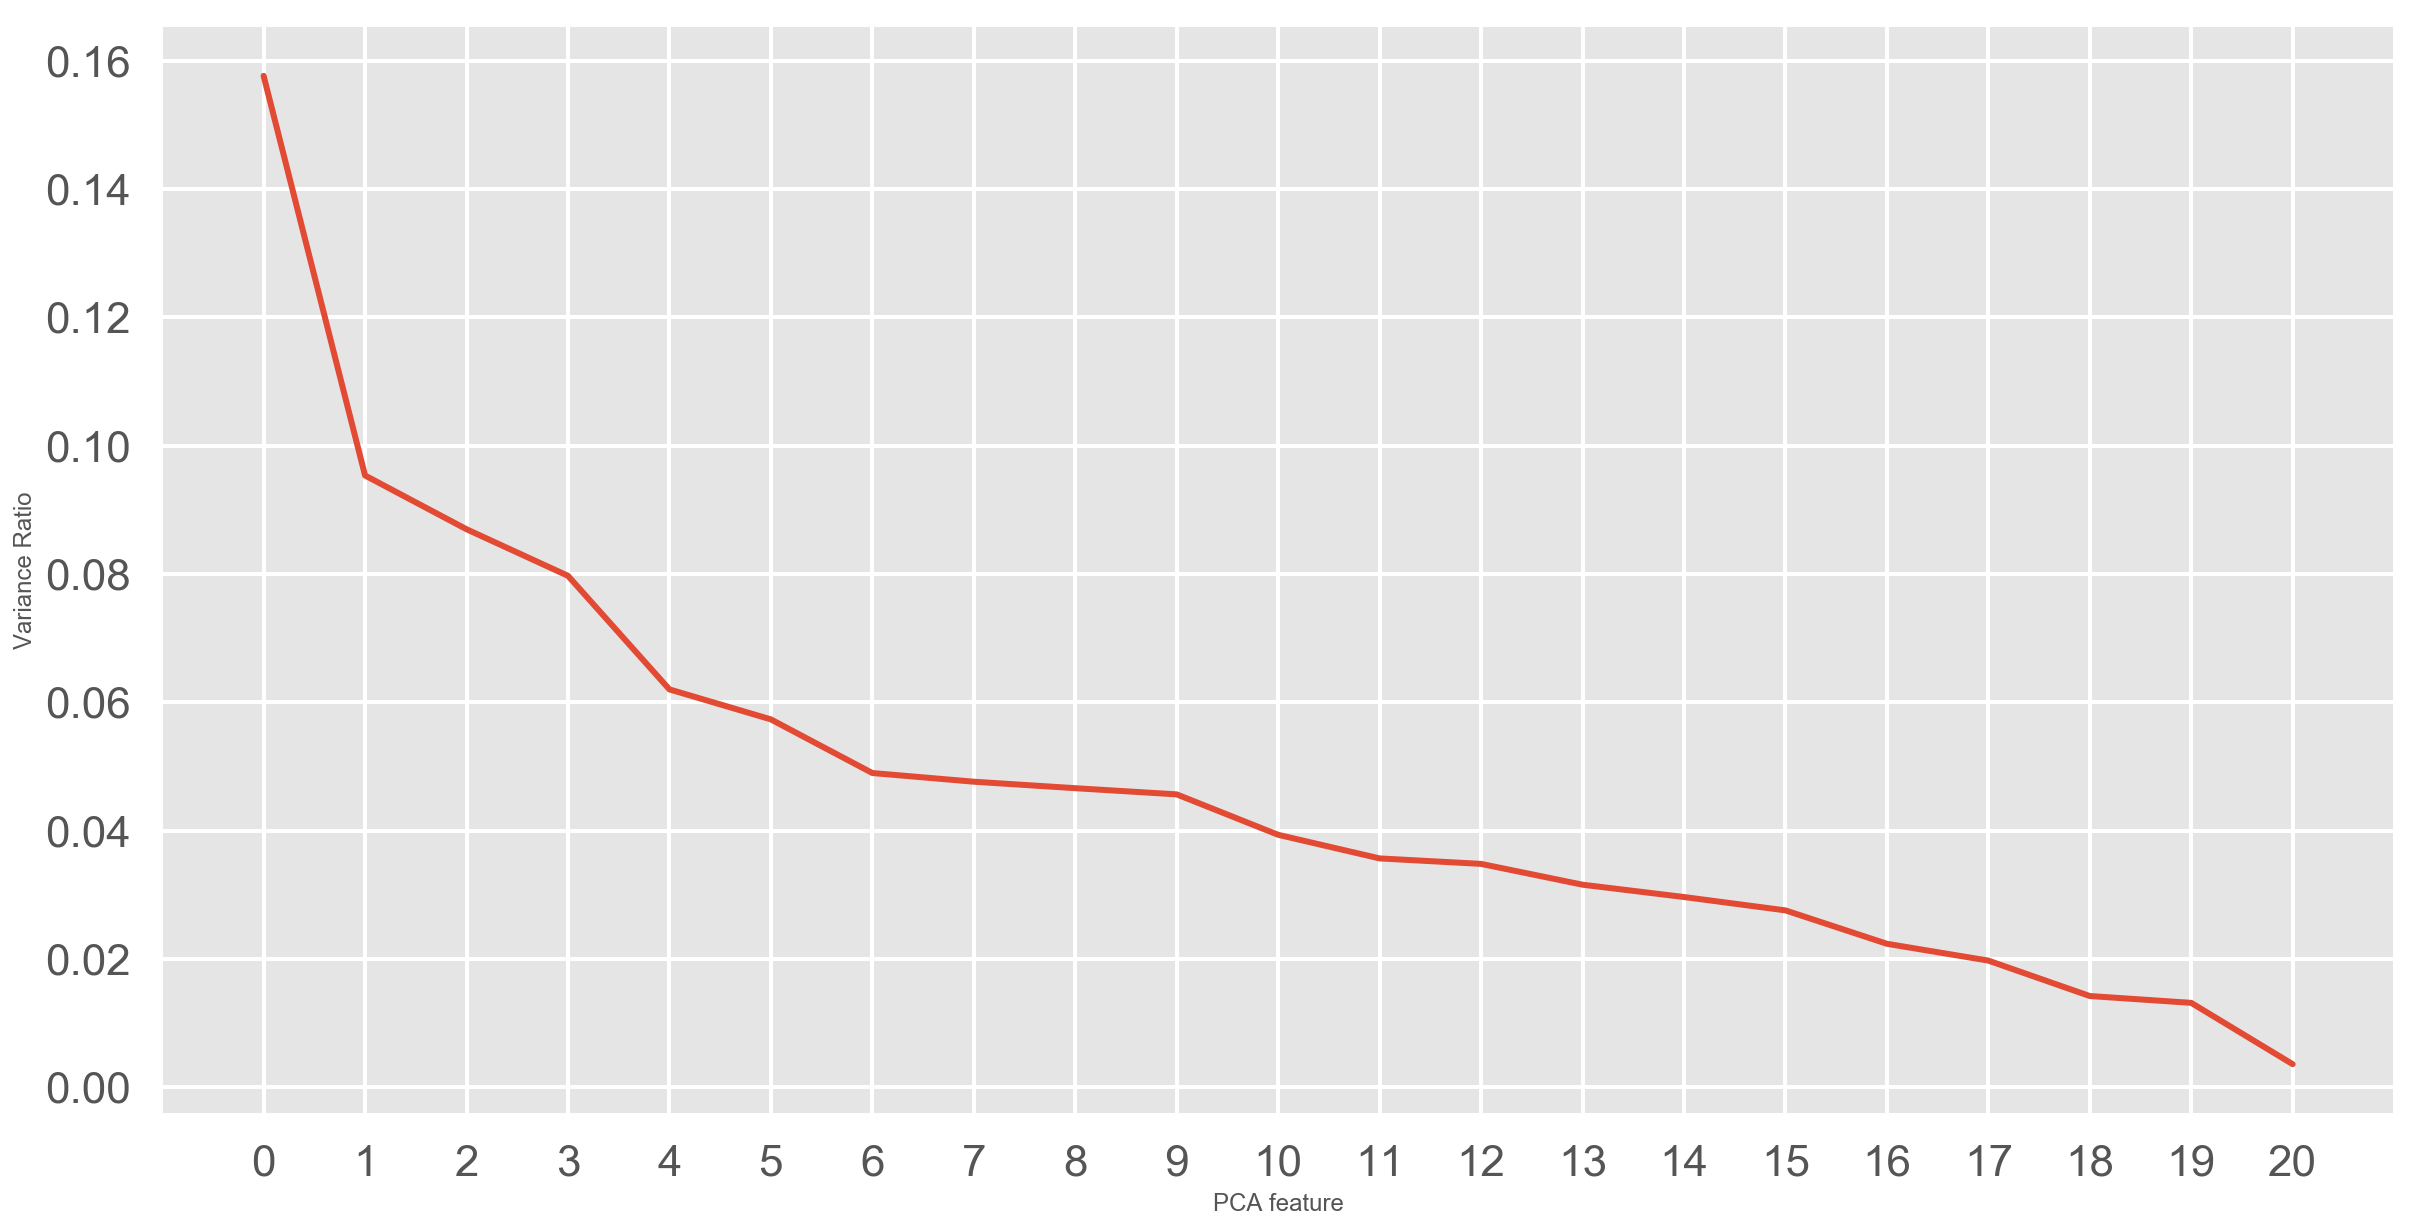

<Figure size 864x432 with 0 Axes>

In [453]:
# Plot the explained variance ratio 
f, ax = plt.subplots(figsize=(20, 10))
features = range(model.n_components_)
plt.plot(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance Ratio')  # cumulative explained variance? 
plt.xticks(features)
plt.show()
plt.savefig('Explained_Variance_ratio_PCA.png', dpi=200)

From scree plot we can see the elbow at component 6. 

## Kaiser-Guttmann

The Kaiser rule is to drop all components with eigenvalues under 1.0 – this being the eigenvalue equal to the information accounted for by an average single item. The Kaiser criterion is the default in SPSS and most statistical software but is not recommended when used as the sole cut-off criterion for estimating the number of factors as it tends to over-extract factors.[20] A variation of this method has been created where a researcher calculates confidence intervals for each eigenvalue and retains only factors which have the entire confidence interval greater than 1.0  (adapted from:  https://en.wikipedia.org/wiki/Factor_analysis#Older_methods )

In [454]:
sum(model.explained_variance_ > 1)

8

## Dimension reduction

In [455]:
# Standardize your data 
# Standardizing the features
newsData_std = StandardScaler().fit_transform(newsData_a)

In [456]:
newsData_std.shape

(39644, 21)

In [495]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 10 components: pca
pca_reduction= PCA(n_components = 6)  # number of components chosen from scree plot. 

# Fit the PCA instance to the scaled samples
pca_reduction.fit(newsData_std)    # use standardized scale data

# Transform the scaled samples: pca_features
pca_features_red = pca_reduction.transform(newsData_std)   # use standardized scale data

# Print the shape of pca_features
print(pca_features_red.shape)

(39644, 6)


Lets plot the first 2 components and see if there is any correlation

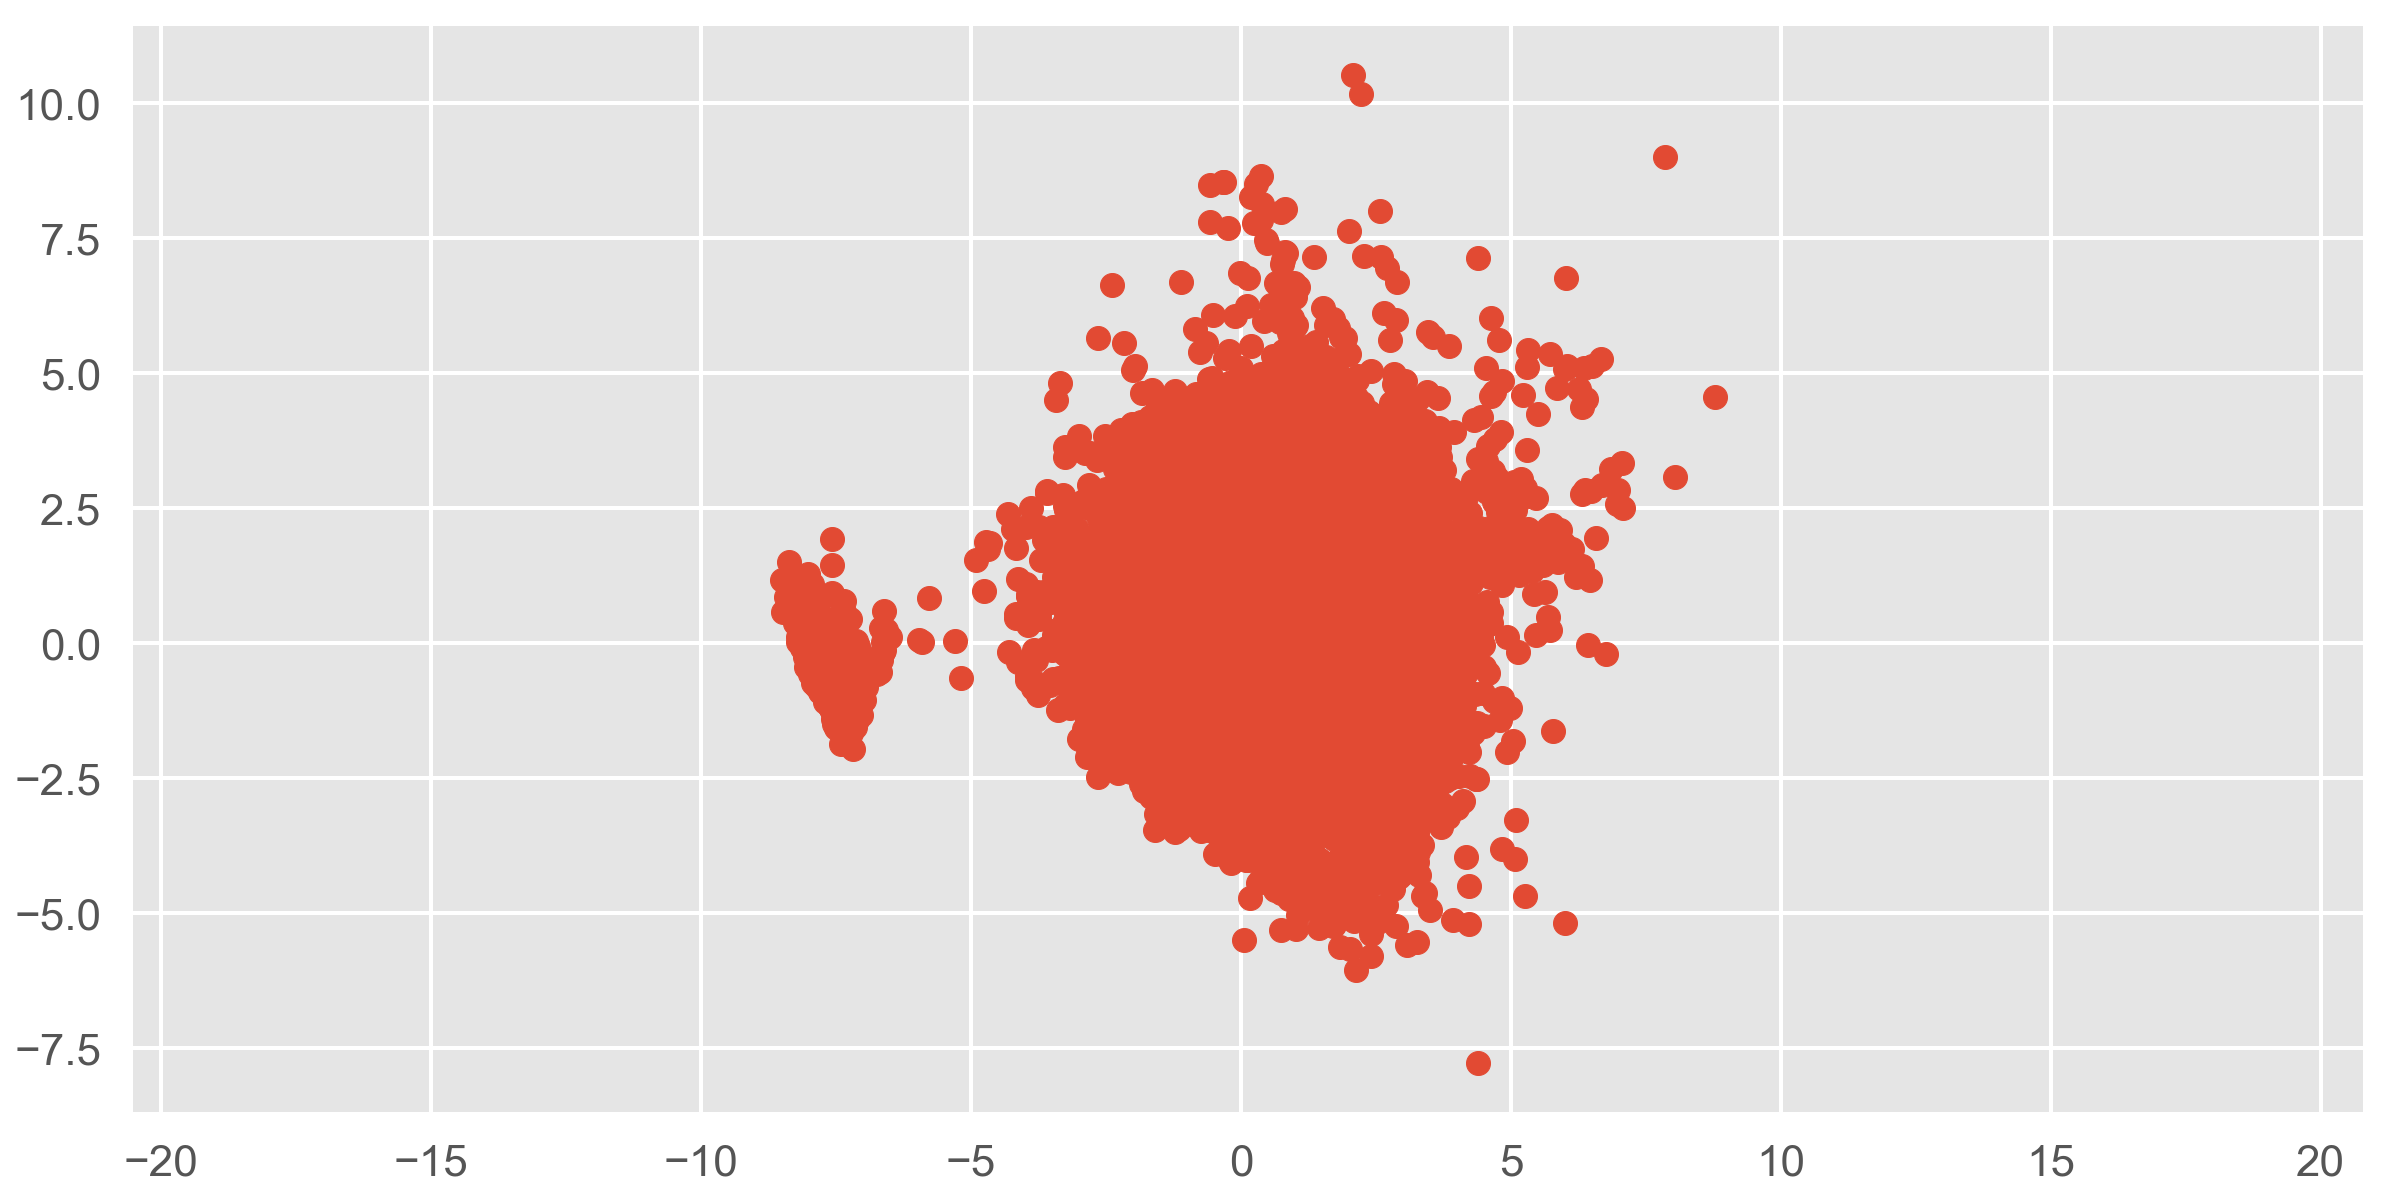

1.1812431347931909e-08


<Figure size 1440x720 with 0 Axes>

In [496]:
from scipy.stats.stats import pearsonr
# Assign 0th column of pca_features: xs
xs = pca_features_red[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features_red[:, 1]

# Scatter plot xs vs ys

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()
plt.savefig('pearsonr.png', dpi=200)

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)


Now that we decided how many components we need to cover a sufficient amount of the structure in the data, we are probably curious about the meaning of these components. 

Which contents do they reflect? 
Which of the variables form a component?

In [514]:
pca_reduction.components_

array([[-0.05363295,  0.22652526,  0.00457439,  0.25856691,  0.19508126,
         0.14235963,  0.08511829,  0.38872482,  0.07482581,  0.02989192,
        -0.09725464,  0.01761257,  0.04617369,  0.4475402 ,  0.24981564,
         0.33381084,  0.14744863,  0.4193297 , -0.24962143,  0.07230067,
         0.06795127],
       [ 0.10176938,  0.17117353,  0.00124531,  0.16134324,  0.07351997,
         0.15067837,  0.19546533,  0.02332649, -0.11142695, -0.00609913,
         0.20796641,  0.15411546,  0.00511247,  0.00612746, -0.55232864,
        -0.25311704,  0.46519892, -0.089454  , -0.36936064,  0.02710588,
        -0.23921075],
       [-0.00928009,  0.38056998,  0.00110274,  0.42114301,  0.3931333 ,
         0.43144997, -0.04210216, -0.1942044 ,  0.24869837,  0.04719787,
        -0.09765667,  0.05780676,  0.11847192, -0.22878642,  0.0320665 ,
        -0.13951562, -0.22943824, -0.17256767,  0.20021767, -0.0094663 ,
         0.10535667],
       [ 0.0997526 , -0.1223208 , -0.0096386 ,  0.0345357 

In [519]:
newsData_a.shape

(39644, 22)

In [527]:
df_reduced= pd.DataFrame(pca_reduction.components_, columns= newsData_a.columns).T 

In [530]:
df_reduced.columns = ['PC'+str(item) for item in range(1, 7)]

In [531]:
df_reduced

PC1       PC2       PC3       PC4       PC5  \
n_tokens_title             -0.053633  0.101769 -0.009280  0.099753 -0.204011   
n_tokens_content            0.226525  0.171174  0.380570 -0.122321 -0.145989   
n_unique_tokens             0.004574  0.001245  0.001103 -0.009639 -0.006617   
num_hrefs                   0.258567  0.161343  0.421143  0.034536 -0.074802   
num_self_hrefs              0.195081  0.073520  0.393133 -0.056833 -0.122793   
num_imgs                    0.142360  0.150678  0.431450  0.064258 -0.036204   
num_videos                  0.085118  0.195465 -0.042102  0.190159 -0.163364   
average_token_length        0.388725  0.023326 -0.194204 -0.184340  0.008825   
num_keywords                0.074826 -0.111427  0.248698 -0.143142  0.422033   
kw_avg_min                  0.029892 -0.006099  0.047198  0.250915  0.654126   
kw_avg_max                 -0.097255  0.207966 -0.097657  0.498130 -0.344318   
kw_avg_avg                  0.017613  0.154115  0.057807  0.611540  0.311769   
is_weekend                  0.046174  0.005112  0.118472  0.021583  0.100165   
global_subjectivity         0.447540  0.006127 -0.228786  0.037198  0.030634   
global_sentiment_polarity   0.249816 -0.552329  0.032066  0.184851 -0.107411   
global_rate_positive_words  0.333811 -0.253117 -0.139516  0.077075 -0.035980   
global_rate_negative_words  0.147449  0.465199 -0.229438 -0.114529  0.100444   
avg_positive_polarity       0.419330 -0.089454 -0.172568  0.056782 -0.017682   
avg_negative_polarity      -0.249621 -0.369361  0.200218  0.039643 -0.077033   
title_subjectivity          0.072301  0.027106 -0.009466  0.267040 -0.073111   
title_sentiment_polarity    0.067951 -0.239211  0.105357  0.244040 -0.145055   

                                 PC6  
n_tokens_title             -0.276678  
n_tokens_content           -0.017639  
n_unique_tokens             0.060556  
num_hrefs                   0.116485  
num_self_hrefs              0.081787  
num_imgs                    0.079932  
num_videos                 -0.141730  
average_token_length        0.142879  
num_keywords               -0.298207  
kw_avg_min                  0.069040  
kw_avg_max                  0.257509  
kw_avg_avg                  0.174936  
is_weekend                 -0.154984  
global_subjectivity         0.031374  
global_sentiment_polarity   0.130848  
global_rate_positive_words -0.086754  
global_rate_negative_words -0.206262  
avg_positive_polarity       0.094085  
avg_negative_polarity       0.065355  
title_subjectivity         -0.613880  
title_sentiment_polarity   -0.423730

Here are some ideas for the interpretation: 
- PC1 reflects “Subjectivity” (high global_subjectivity and avg_positive_polarity, negative loading on avg_negative_polarity). 
- PC2 contains “Positivity” (high global_sentiment_polarity, low global_rate_negative_words; even negative words are not very negative as you can see from the positive loading on avg_negative_polarity). 
- We see that the same group of intercorrelated variables from the corrplot, but they split into two components.

In [497]:
# creating a data frame with pca components
principalDf = pd.DataFrame(data = pca_features_red)

In [498]:
principalDf.shape

(39644, 6)

In [499]:
principalDf.head()

0         1         2         3         4         5
0  0.144081 -0.483931 -1.611215 -2.376448 -0.687113 -0.812080
1 -1.218901 -1.593521 -0.938728 -2.691078 -0.788681  0.427823
2  2.129212 -2.354180 -2.112819 -2.136398 -0.348215  0.420858
3  0.022393 -0.454710 -0.926444 -2.991879  0.037594 -0.266371
4  3.073426 -1.621539  2.770416 -1.938782 -1.864457 -0.790819

In [501]:
principalDf.columns = ['PC'+str(item) for item in range(1, 7)]

In [502]:
principalDf.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  0.144081 -0.483931 -1.611215 -2.376448 -0.687113 -0.812080
1 -1.218901 -1.593521 -0.938728 -2.691078 -0.788681  0.427823
2  2.129212 -2.354180 -2.112819 -2.136398 -0.348215  0.420858
3  0.022393 -0.454710 -0.926444 -2.991879  0.037594 -0.266371
4  3.073426 -1.621539  2.770416 -1.938782 -1.864457 -0.790819

We will now perform linear regression analysis with a new variable, "logshare" with the original data and with these 12 PC components.

In [472]:
# calculating logshare from "share" column in the newsData 
newsData_a['logshares'] = np.log(newsData['shares'])
newsData_a['logshares'].head()

0    6.385194
1    6.566672
2    7.313220
3    7.090077
4    6.224558
Name: logshares, dtype: float64

In [503]:
# adding the logshare column to principalDf
principalDf['logshares'] = np.log(newsData['shares'])

In [504]:
principalDf.head()

PC1       PC2       PC3       PC4       PC5       PC6  logshares
0  0.144081 -0.483931 -1.611215 -2.376448 -0.687113 -0.812080   6.385194
1 -1.218901 -1.593521 -0.938728 -2.691078 -0.788681  0.427823   6.566672
2  2.129212 -2.354180 -2.112819 -2.136398 -0.348215  0.420858   7.313220
3  0.022393 -0.454710 -0.926444 -2.991879  0.037594 -0.266371   7.090077
4  3.073426 -1.621539  2.770416 -1.938782 -1.864457 -0.790819   6.224558

### Regression analysis with Many Variables Vs their PCA components

In [479]:
# Linear regression with all the variables 
from sklearn.linear_model import LinearRegression
X = newsData_a.drop('logshares', axis = 1)

# This creates a LinearRegression object
lm_all = LinearRegression()
lm_all

lm_all.fit(X, newsData_a.logshares)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [480]:
lm_all.score(X, newsData_a.logshares)

0.0799755640174683

In [481]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [482]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [489]:
vif

VIF Factor                    features
0    19.413792              n_tokens_title
1     3.335565            n_tokens_content
2     1.026498             n_unique_tokens
3     2.948667                   num_hrefs
4     2.170397              num_self_hrefs
5     1.700050                    num_imgs
6     1.222423                  num_videos
7    45.637402        average_token_length
8    14.233546                num_keywords
9     1.727662                  kw_avg_min
10    7.427232                  kw_avg_max
11   12.343251                  kw_avg_avg
12    1.170368                  is_weekend
13   40.024822         global_subjectivity
14   17.093201   global_sentiment_polarity
15   18.139153  global_rate_positive_words
16   10.423926  global_rate_negative_words
17   43.208810       avg_positive_polarity
18    9.450196       avg_negative_polarity
19    1.975245          title_subjectivity
20    1.215339    title_sentiment_polarity

We see that 9 features have more than 10 for vif showing multicollinearity. We can either remove these variables run an AIC() or RFE to fine tune the model as we have done earlier or we can perform a linear regression of PCA analysis

### Linear Regression with PCA. 

In [507]:
# Linear regression with top 10 PCA components 

In [508]:
# This creates a LinearRegression object
lm_PCA = LinearRegression()
lm_PCA

lm_PCA.fit(principalDf, newsData_a.logshares)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [509]:
lm_PCA.score(principalDf, newsData_a.logshares)

1.0

## Comparing the two models  

We ran two regression models, one with 21 variables and another with 

When we compare the 2 models we see that the prior had mulitcollinearity problem whereas the later did not. Also the regression score was high for the later. 

# Conclusions 

- We peformed CRM data analysis by reducing the number of variables without reducing too mcuh information. 
- We were able to interpret selected components and match it with the fratures/ variables. 

- We also used Scree plot and Kaiser-Guttmann method to minimize the no. of PCA components used for analysis. 

- Further we ran a linear regression using these condensed data or PCA components and compared it to the anlysis with all the variables selected.  

- We found that 6 components are enough to predict customer activity and brand awareness. 

- Using these six components decresed the explained variance, but solves the milticollinerity problem. 
